In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

color_pal = sns.color_palette()
plt.style.use("fivethirtyeight")

In [4]:
df=pd.read_csv("train.csv")
#df = df.iloc[:, 1:] #dropping the id column it has nothing to do 

In [5]:
df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [7]:
df.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,29322.000000,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,16929.497605,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,0.000000,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,14661.000000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,29322.000000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,43983.000000,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,58644.000000,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'person_age'}>,
        <Axes: title={'center': 'person_income'}>],
       [<Axes: title={'center': 'person_emp_length'}>,
        <Axes: title={'center': 'loan_amnt'}>,
        <Axes: title={'center': 'loan_int_rate'}>],
       [<Axes: title={'center': 'loan_percent_income'}>,
        <Axes: title={'center': 'cb_person_cred_hist_length'}>,
        <Axes: title={'center': 'loan_status'}>]], dtype=object)

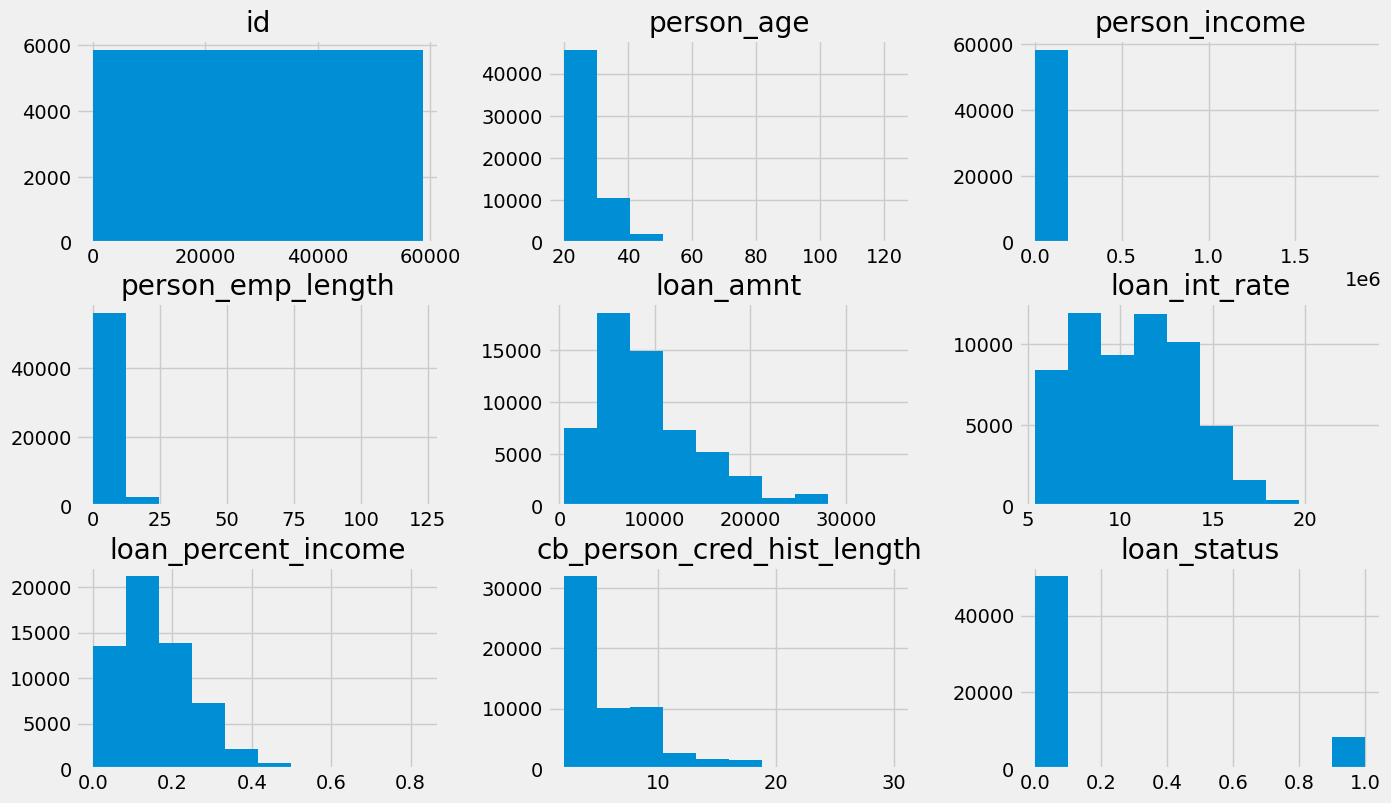

In [8]:
df.hist(figsize=(15,9))

In [9]:
correlation_matrix= df.select_dtypes(include=[np.number]).corr()
correlation_matrix

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
id,1.000000,0.008608,-0.001896,0.005376,-0.000403,-0.003454,-0.002677,0.008139,-0.008138
person_age,0.008608,1.000000,0.102176,0.121276,0.050378,0.009653,-0.031975,0.874260,-0.001130
person_income,-0.001896,0.102176,1.000000,0.164042,0.310942,-0.057611,-0.280314,0.082727,-0.169956
person_emp_length,0.005376,0.121276,0.164042,1.000000,0.092046,-0.101910,-0.065824,0.102842,-0.100428
loan_amnt,-0.000403,0.050378,0.310942,0.092046,1.000000,0.113582,0.647266,0.045720,0.144982
loan_int_rate,-0.003454,0.009653,-0.057611,-0.101910,0.113582,1.000000,0.152201,0.007535,0.338948
loan_percent_income,-0.002677,-0.031975,-0.280314,-0.065824,0.647266,0.152201,1.000000,-0.023202,0.378280
cb_person_cred_hist_length,0.008139,0.874260,0.082727,0.102842,0.045720,0.007535,-0.023202,1.000000,-0.003030
loan_status,-0.008138,-0.001130,-0.169956,-0.100428,0.144982,0.338948,0.378280,-0.003030,1.000000


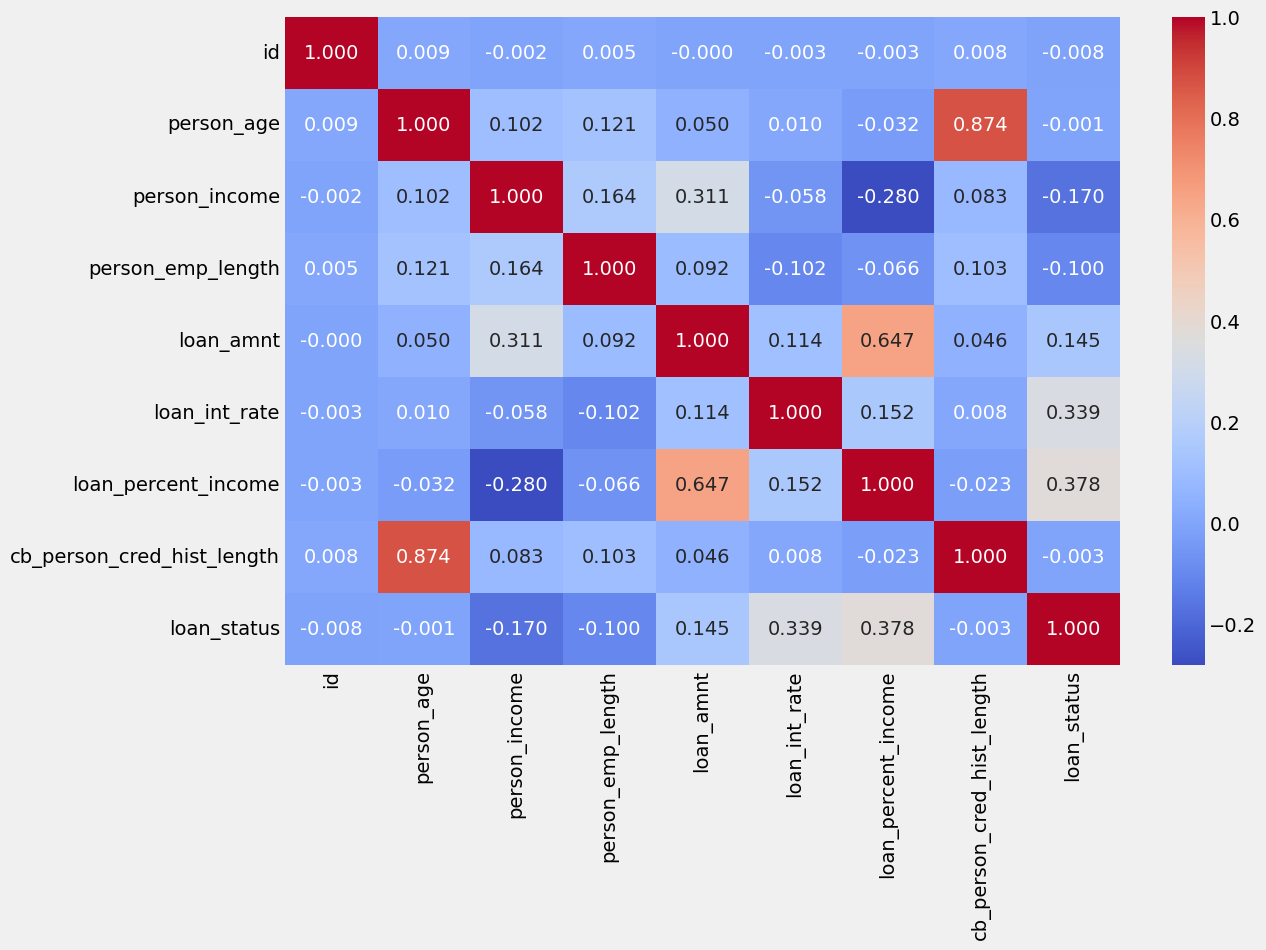

In [10]:
plt.figure(figsize=(12,8))
corr_matrix= sns.heatmap(correlation_matrix , annot=True , cmap= 'coolwarm' , fmt='.3f' )

In [11]:
df1=df.copy()

<Axes: xlabel='person_age'>

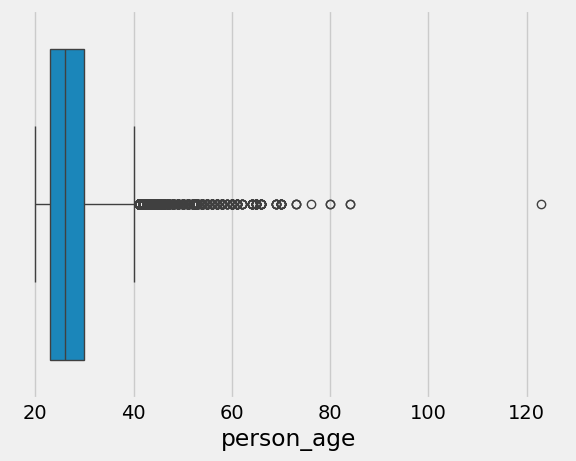

In [12]:
sns.boxplot(x=df1['person_age'])

we have a lot of outliers!

In [13]:
#TODO this is debatable because we are removing any person with age greater than 40!

Q1 = df1['person_age'].quantile(0.25)
Q3 = df1['person_age'].quantile(0.75)
IQR = Q3 - Q1
print('Q1:',Q1)
print('Q3:',Q3)
print('IQR:',IQR)

# Define lower and upper bounds
lower_bound_age = Q1 - 1.5 * IQR
upper_bound_age = Q3 + 1.5 * IQR
print('lower bound _age:', lower_bound_age)
print('upper bound _age:', upper_bound_age)

# Find outliers
outliers = df1[(df1['person_age'] < lower_bound_age) | (df1['person_age'] > upper_bound_age)]
print('number of outliers wrt age:',len(outliers))
df2= df1.copy()
df2 = df1[~((df1['person_age'] < lower_bound_age) | (df1['person_age'] > upper_bound_age))]

Q1: 23.0
Q3: 30.0
IQR: 7.0
lower bound _age: 12.5
upper bound _age: 40.5
number of outliers wrt age: 2446


In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56199 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          56199 non-null  int64  
 1   person_age                  56199 non-null  int64  
 2   person_income               56199 non-null  int64  
 3   person_home_ownership       56199 non-null  object 
 4   person_emp_length           56199 non-null  float64
 5   loan_intent                 56199 non-null  object 
 6   loan_grade                  56199 non-null  object 
 7   loan_amnt                   56199 non-null  int64  
 8   loan_int_rate               56199 non-null  float64
 9   loan_percent_income         56199 non-null  float64
 10  cb_person_default_on_file   56199 non-null  object 
 11  cb_person_cred_hist_length  56199 non-null  int64  
 12  loan_status                 56199 non-null  int64  
dtypes: float64(3), int64(6), object(4)
m

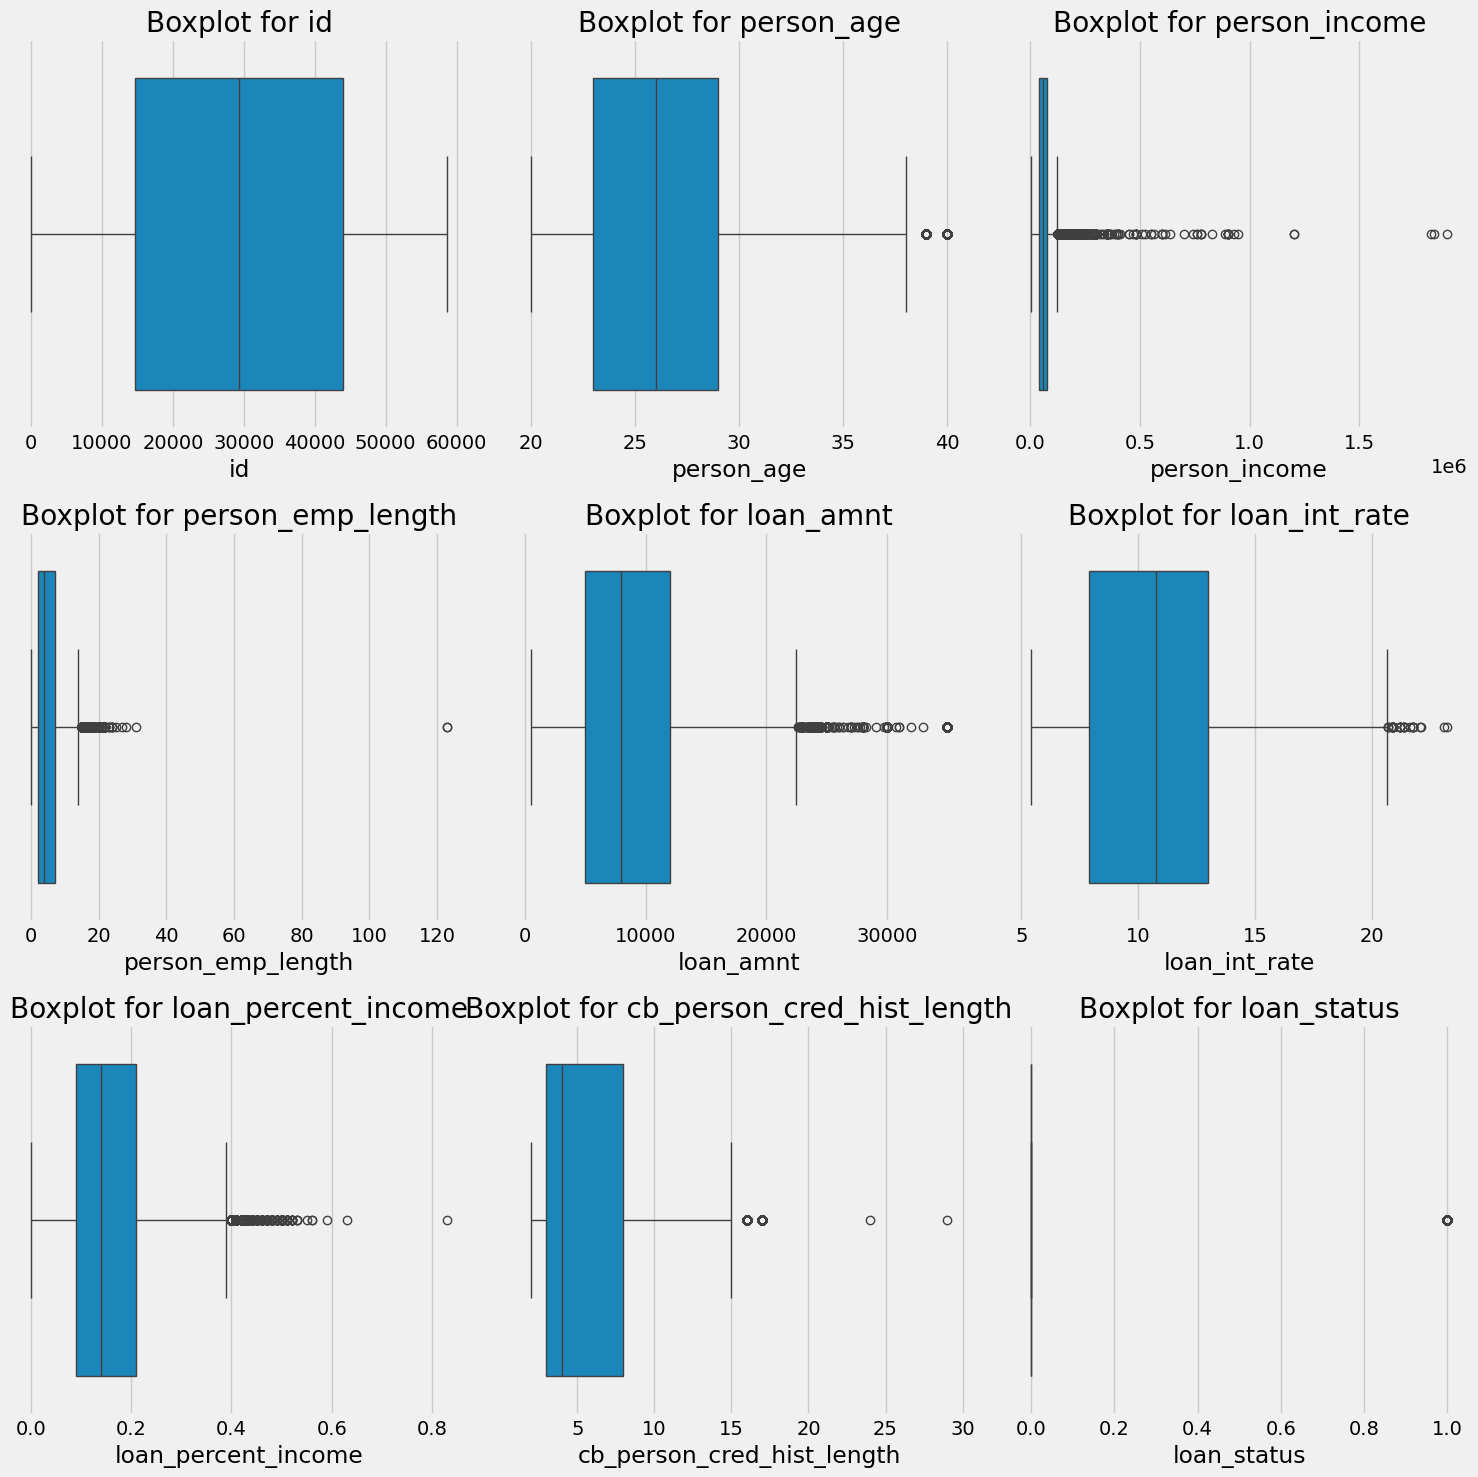

In [16]:
numerical_columns = df2.select_dtypes(include=['float64', 'int64']).columns

# Define grid size
n_features = len(numerical_columns)
n_cols = 3  # Number of columns in the grid
n_rows = 3  # Calculate rows needed

# Create the grid of subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, n_rows * 5))

# Flatten axes for easy indexing
axes = axes.flatten()

# Generate boxplots for each numerical column
for i, col in enumerate(numerical_columns):
    sns.boxplot(x=df2[col], ax=axes[i])
    axes[i].set_title(f'Boxplot for {col}')

# Turn off unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

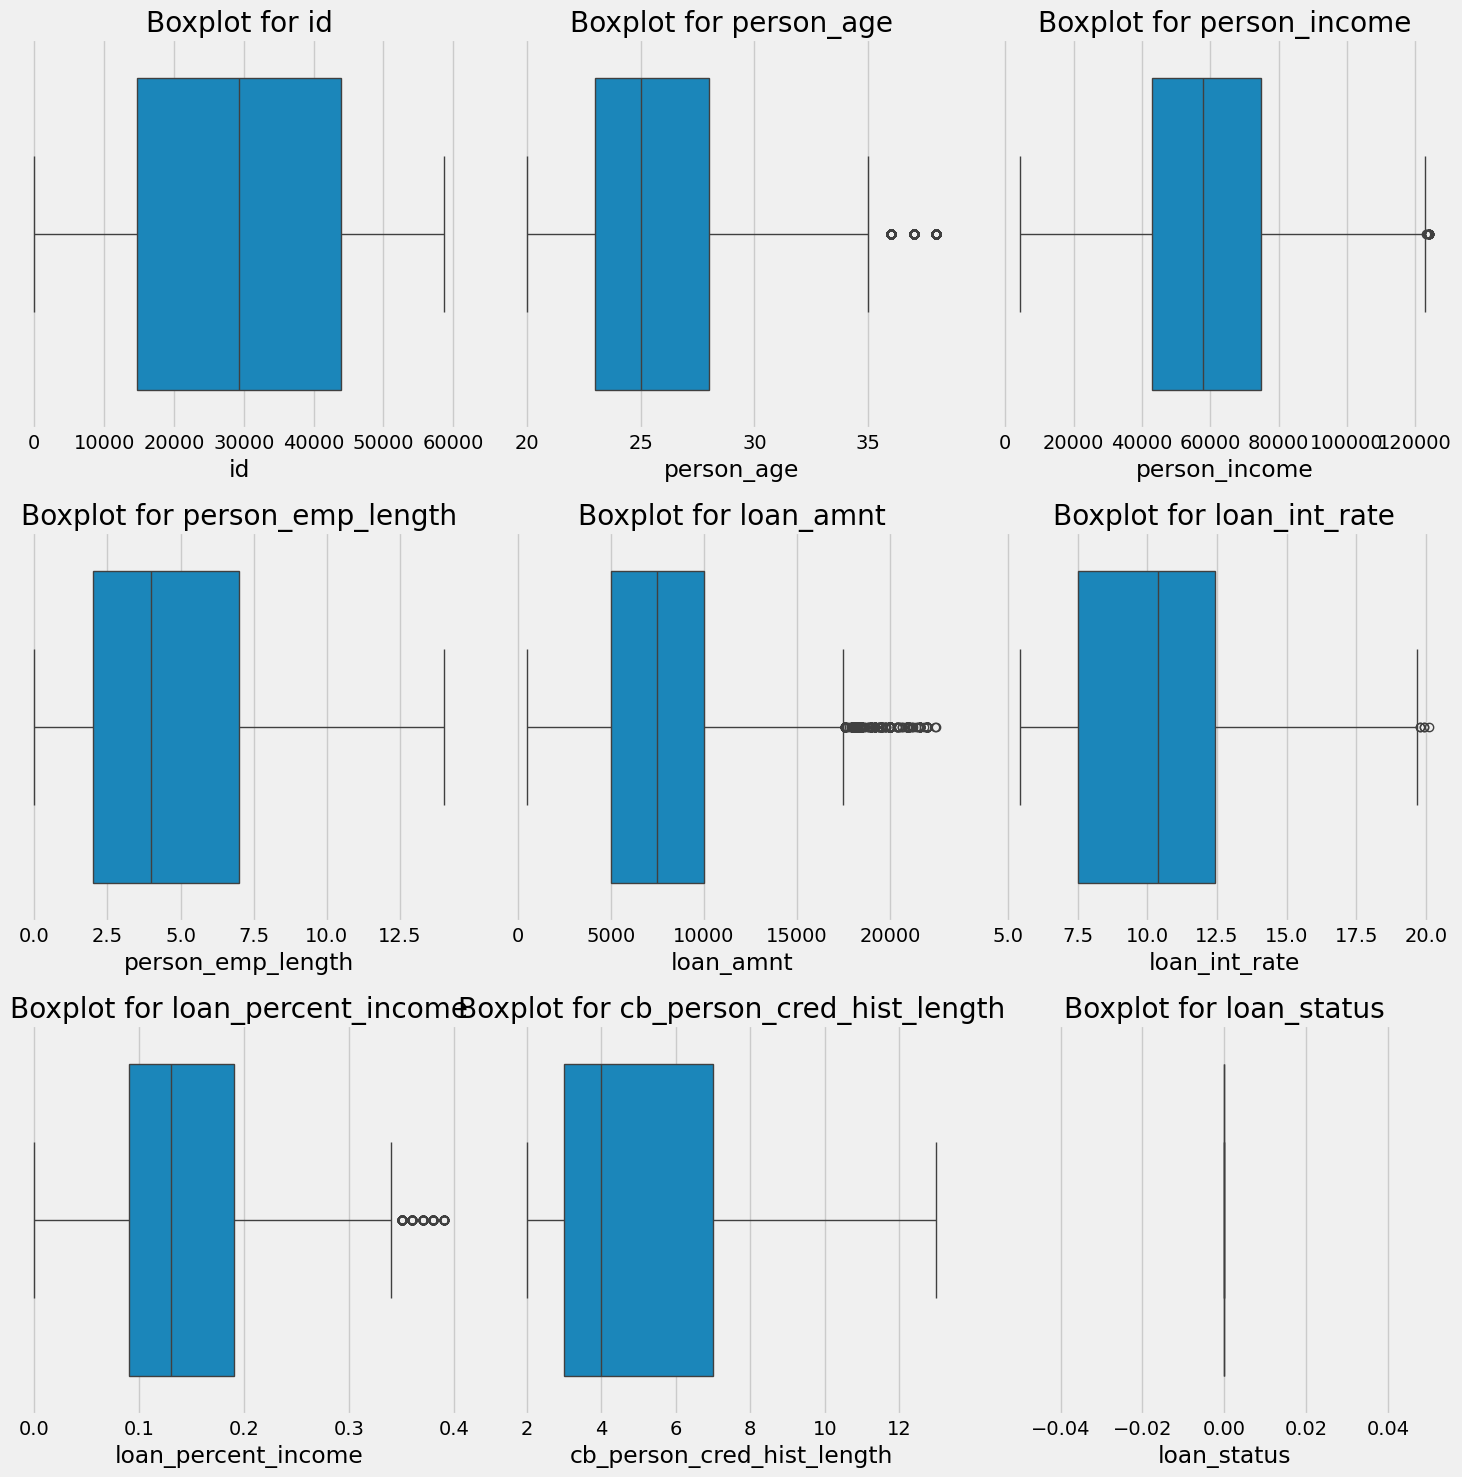

In [17]:

# Calculate the IQR and remove outliers
for col in numerical_columns:
    Q1 = df2[col].quantile(0.25)  # First quartile
    Q3 = df2[col].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1                 # Interquartile range
    
    lower_bound = Q1 - 1.5 * IQR  # Lower bound
    upper_bound = Q3 + 1.5 * IQR  # Upper bound
    
    # Filter out the outliers
    df2 = df2[(df2[col] >= lower_bound) & (df2[col] <= upper_bound)]

# Plot boxplots again to confirm removal of outliers
n_features = len(numerical_columns)
n_cols = 3  # Number of columns in the grid
n_rows = 3  # Calculate rows needed

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    sns.boxplot(x=df2[col], ax=axes[i])
    axes[i].set_title(f'Boxplot for {col}')

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'person_age'}>,
        <Axes: title={'center': 'person_income'}>],
       [<Axes: title={'center': 'person_emp_length'}>,
        <Axes: title={'center': 'loan_amnt'}>,
        <Axes: title={'center': 'loan_int_rate'}>],
       [<Axes: title={'center': 'loan_percent_income'}>,
        <Axes: title={'center': 'cb_person_cred_hist_length'}>,
        <Axes: title={'center': 'loan_status'}>]], dtype=object)

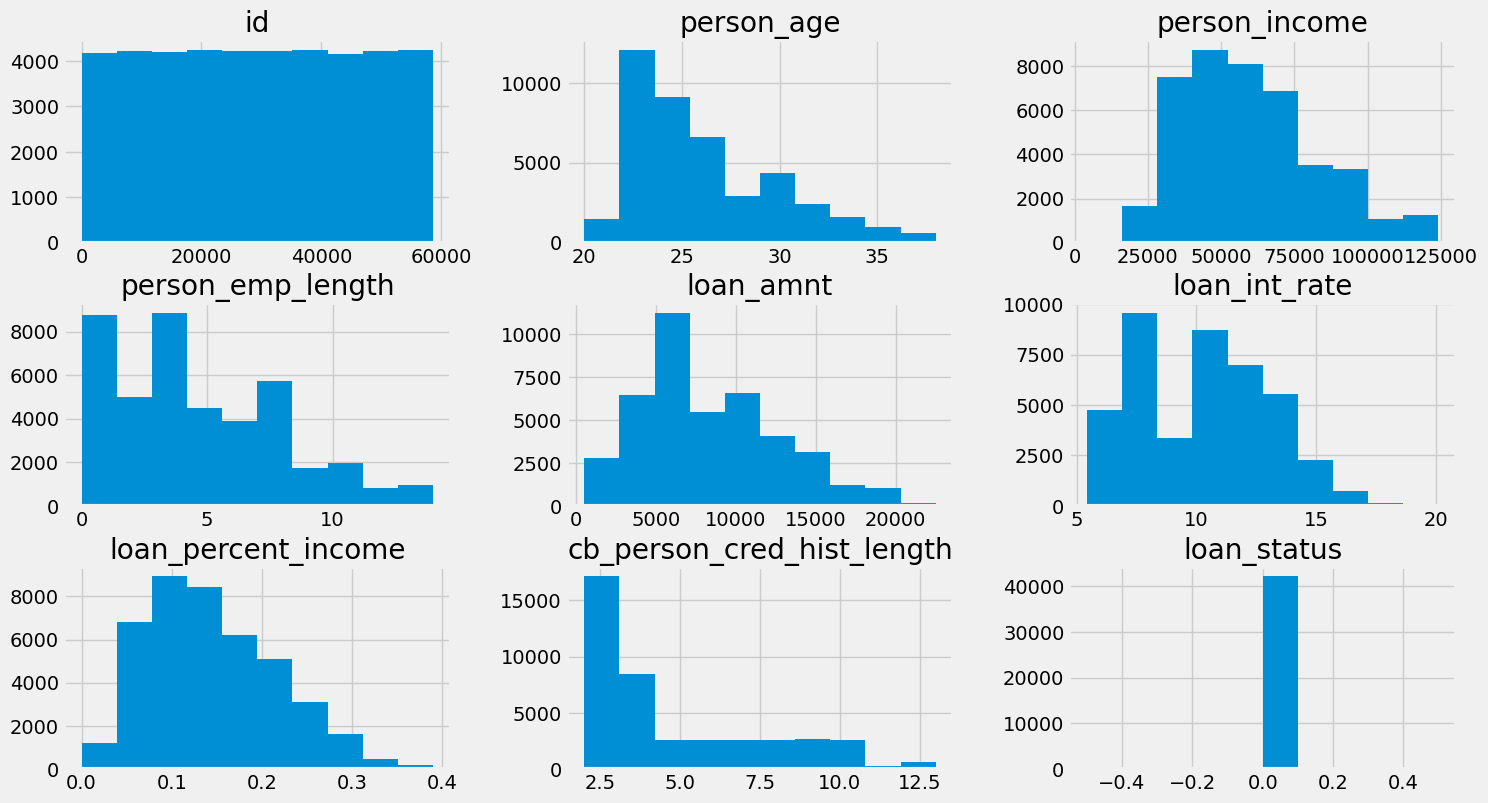

In [18]:
df2.hist(figsize=(16,9))

In [19]:
df2.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0
5,5,27,45000,RENT,2.0,VENTURE,A,9000,8.94,0.20,N,5,0


In [20]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42171 entries, 1 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          42171 non-null  int64  
 1   person_age                  42171 non-null  int64  
 2   person_income               42171 non-null  int64  
 3   person_home_ownership       42171 non-null  object 
 4   person_emp_length           42171 non-null  float64
 5   loan_intent                 42171 non-null  object 
 6   loan_grade                  42171 non-null  object 
 7   loan_amnt                   42171 non-null  int64  
 8   loan_int_rate               42171 non-null  float64
 9   loan_percent_income         42171 non-null  float64
 10  cb_person_default_on_file   42171 non-null  object 
 11  cb_person_cred_hist_length  42171 non-null  int64  
 12  loan_status                 42171 non-null  int64  
dtypes: float64(3), int64(6), object(4)
m

In [21]:
duplicates = df2.duplicated()

# Count the number of duplicate rows
num_duplicates = duplicates.sum()
print(f"Number of duplicate rows: {num_duplicates}")

# Display duplicate rows
if num_duplicates > 0:
    print("Duplicate rows:")
    print(df2[duplicates])
else:
    print("No duplicate rows found.")

Number of duplicate rows: 0
No duplicate rows found.


In [22]:
def plot_features_importance(colnames_weight):
    
    fig,ax =plt.subplots()
    
    pd.Series(colnames_weight).nlargest(
        len(colnames_weight)).plot(kind='bar', ax=ax)
    ax.set_title('Feature_Importance')
    ax.set_xlabel('Feature')
    ax.set_ylabel('Importance')
    fig.tight_layout()
    img=plt.gcf()
    plt.close()
    
    return img , colnames_weight

In [23]:
df3=df2.copy()

In [24]:
df_encoded = pd.get_dummies(df3, columns=['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file'])
df_encoded.head()


,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status,person_home_ownership_MORTGAGE,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
1,1,22,56000,6.0,4000,13.35,0.07,2,0,False,...,False,False,False,True,False,False,False,False,True,False
2,2,29,28800,8.0,6000,8.90,0.21,10,0,False,...,False,True,False,False,False,False,False,False,True,False
3,3,30,70000,14.0,12000,11.11,0.17,5,0,False,...,True,False,True,False,False,False,False,False,True,False
4,4,22,60000,2.0,6000,6.92,0.10,3,0,False,...,False,True,False,False,False,False,False,False,True,False
5,5,27,45000,2.0,9000,8.94,0.20,5,0,False,...,True,True,False,False,False,False,False,False,True,False


In [25]:
X= df_encoded.drop('loan_status', axis=1)
y= df_encoded['loan_status']

In [26]:
import sklearn 
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train , y_test= train_test_split(X , y , test_size=0.1 , random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(37953, 27)
(37953,)
(4218, 27)
(4218,)


In [28]:
def remove_duplicates(data: pd.DataFrame) -> pd.DataFrame:
    """
    Removes duplicate rows from the input DataFrame.

    Args:
        data (pd.DataFrame): Input DataFrame to remove duplicates from.

    Returns:
        pd.DataFrame: DataFrame with duplicates removed.
    """
    # Remove duplicates and return the cleaned DataFrame
    return data.drop_duplicates()

In [29]:
rd=remove_duplicates(df)

In [30]:
print(len(df))
print(len(rd))


58645
58645


In [31]:
x=df.drop(columns=['id','loan_status'])
y=df['loan_status']

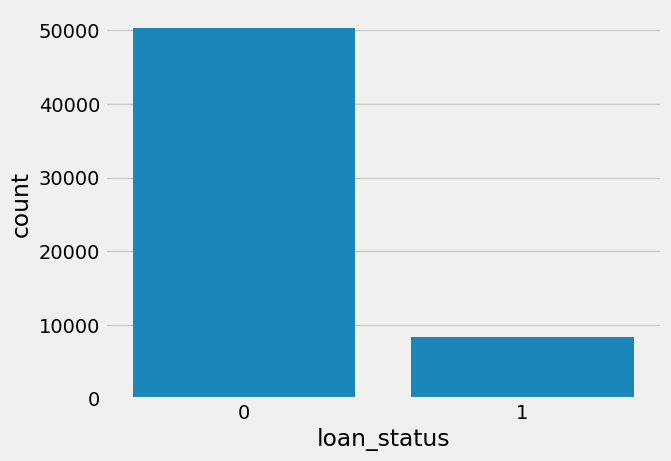

In [32]:
sns.countplot(x='loan_status', data=df)
plt.show()

In [33]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [34]:
X_encoded=pd.get_dummies(x)
test_encoded=pd.get_dummies(test.drop(columns=['id']))

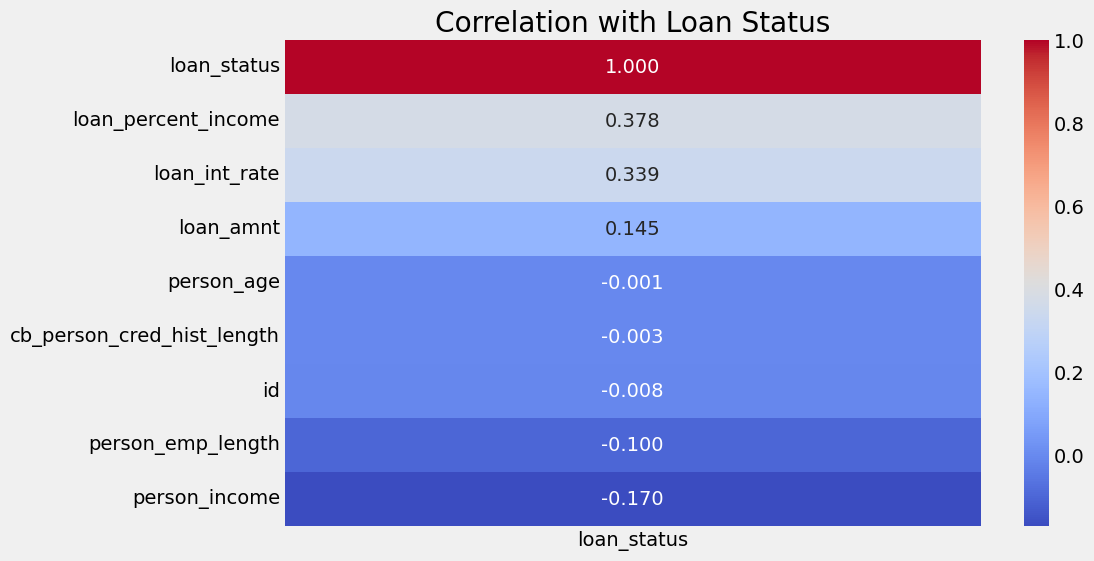

loan_status                   1.000000
loan_percent_income           0.378280
loan_int_rate                 0.338948
loan_amnt                     0.144982
person_age                   -0.001130
cb_person_cred_hist_length   -0.003030
id                           -0.008138
person_emp_length            -0.100428
person_income                -0.169956
Name: loan_status, dtype: float64


In [35]:
correlation_with_loan_status = train.corr(numeric_only=True)['loan_status'].sort_values(ascending=False)


# 상관관계 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(pd.DataFrame(correlation_with_loan_status), annot=True, cmap='coolwarm', fmt=".3f")
plt.title('Correlation with Loan Status')
plt.show()

# 상관관계 출력
print(correlation_with_loan_status)

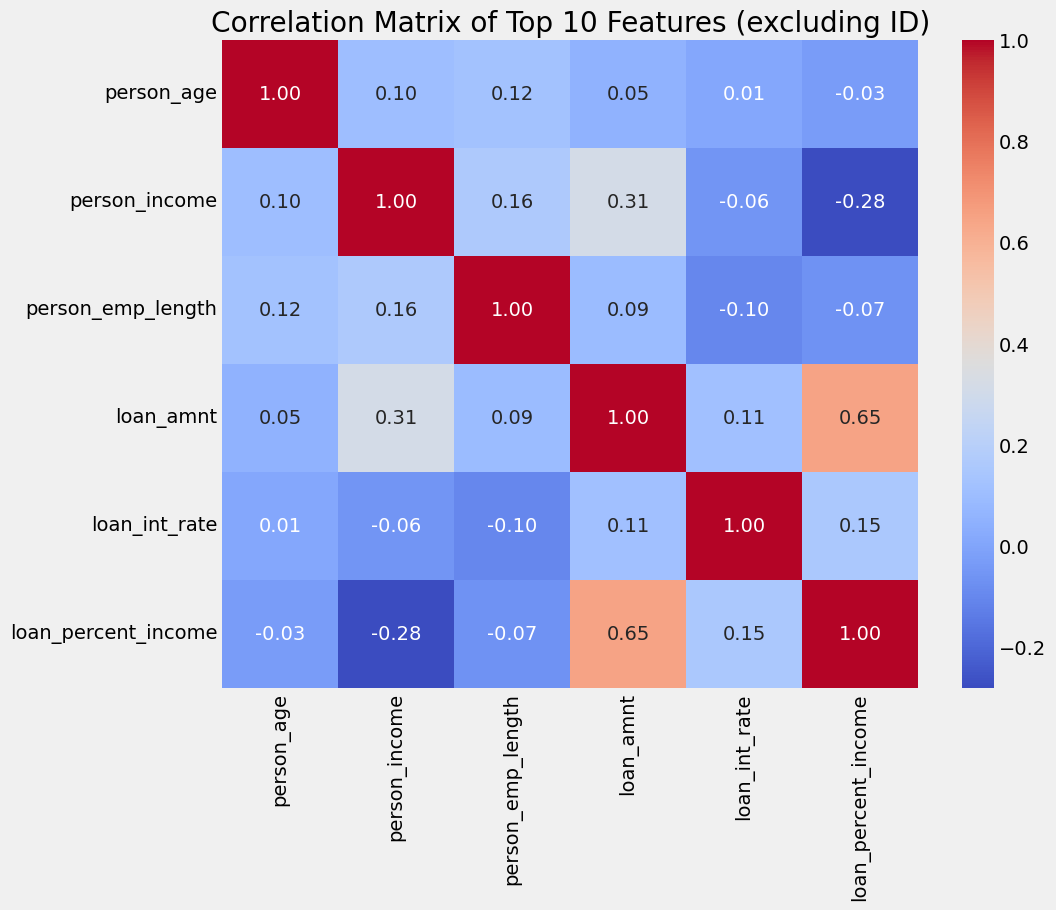

In [36]:
top_10_features = train.columns[1:11]

# 숫자형 변수만 선택
numeric_features = train[top_10_features].select_dtypes(include=np.number)

# Heatmap으로 상관관계 시각화
correlation_matrix = numeric_features.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Top 10 Features (excluding ID)')
plt.show()

C:\Users\umert\AppData\Local\Temp\ipykernel_19940\496362082.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 2].set_xticklabels(emp_length_labels, rotation=45)


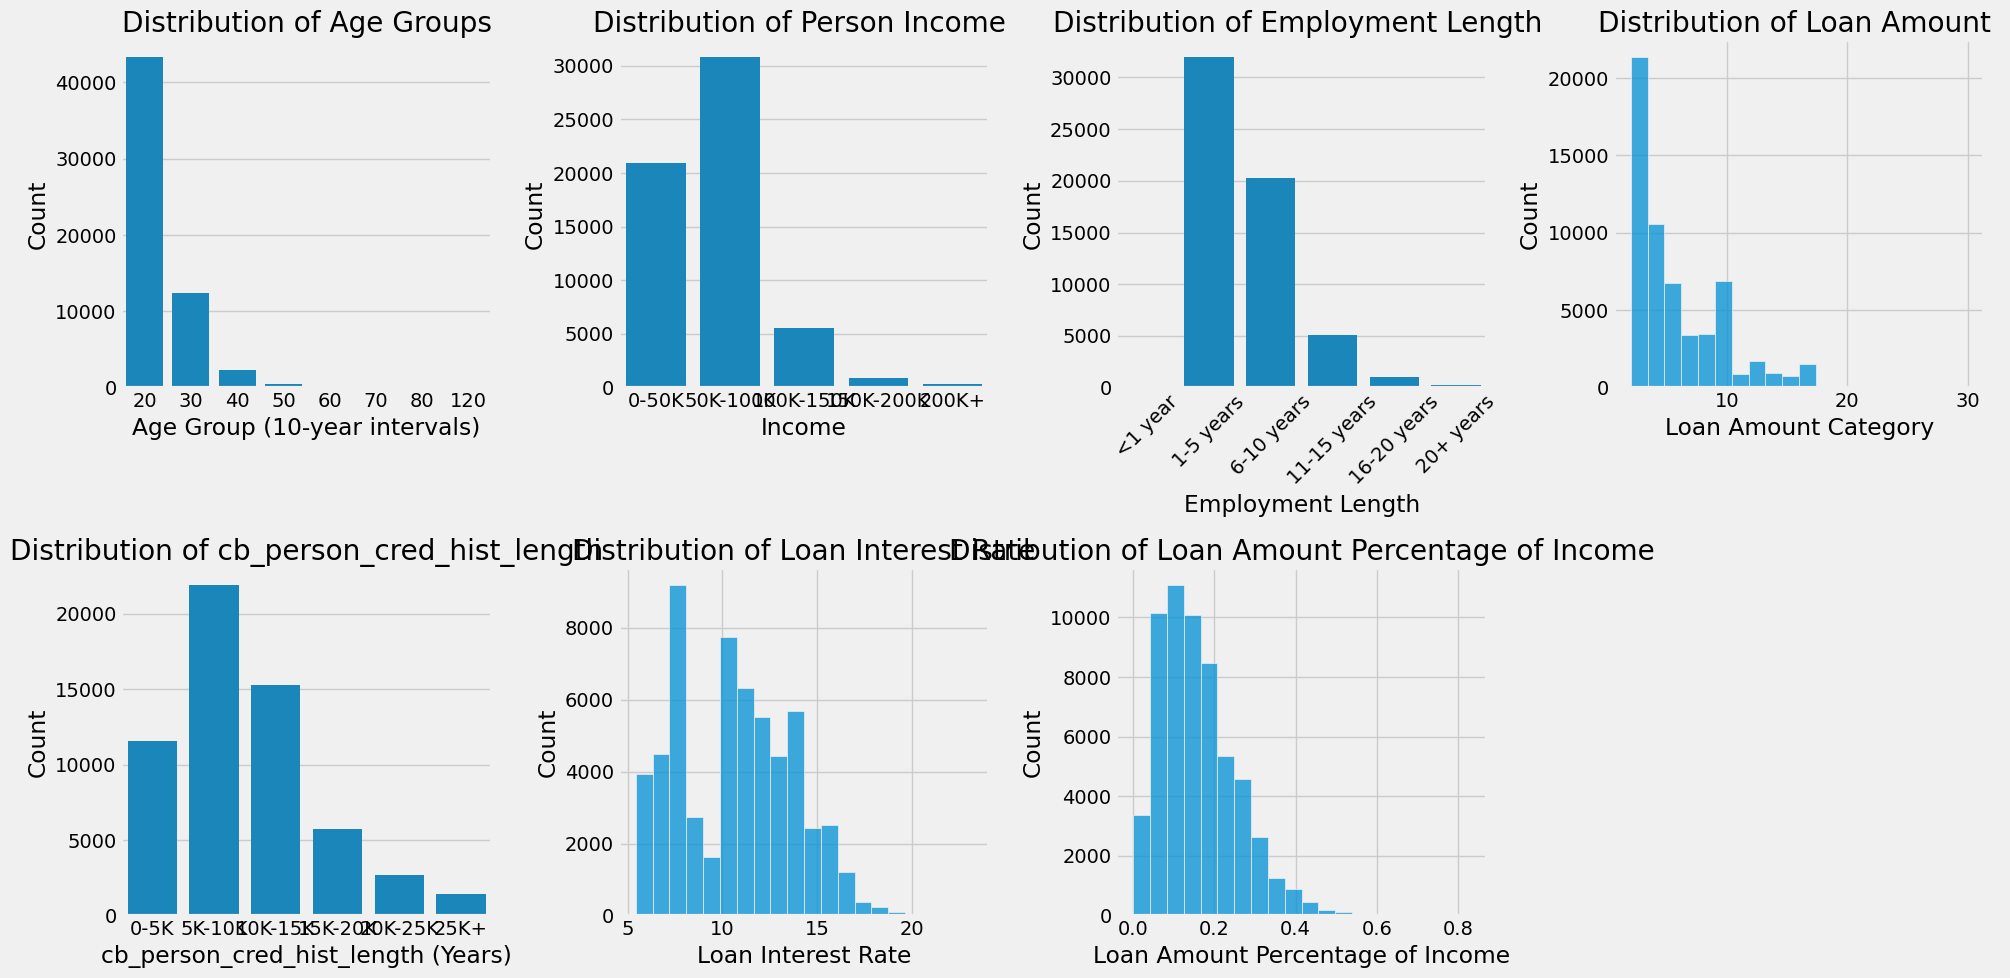

In [37]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

# Age group distribution (나이)
train['age_group'] = (train['person_age'] // 10) * 10
sns.countplot(x='age_group', data=train, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Age Groups')
axes[0, 0].set_xlabel('Age Group (10-year intervals)')
axes[0, 0].set_ylabel('Count')

# Income distribution (연간 소득)
income_bins = [0, 50000, 100000, 150000, 200000, float('inf')]
income_labels = ['0-50K', '50K-100K', '100K-150K', '150K-200K', '200K+']
train['income_category'] = pd.cut(train['person_income'], bins=income_bins, labels=income_labels, right=False)
sns.countplot(x='income_category', data=train, order=income_labels, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Person Income ')
axes[0, 1].set_xlabel('Income')
axes[0, 1].set_ylabel('Count')

# Employment length distribution (근속 연수)
emp_length_bins = [-1, 0, 5, 10, 15, 20, float('inf')]
emp_length_labels = ['<1 year', '1-5 years', '6-10 years', '11-15 years', '16-20 years', '20+ years']
train['emp_length_category'] = pd.cut(train['person_emp_length'], bins=emp_length_bins, labels=emp_length_labels, right=False)
sns.countplot(x='emp_length_category', data=train, order=emp_length_labels, ax=axes[0, 2])
axes[0, 2].set_title('Distribution of Employment Length ')
axes[0, 2].set_xlabel('Employment Length')
axes[0, 2].set_ylabel('Count')
axes[0, 2].set_xticklabels(emp_length_labels, rotation=45)

# Loan amount distribution (대출 금액)
loan_amnt_bins = [0, 5000, 10000, 15000, 20000, 25000, float('inf')]
loan_amnt_labels = ['0-5K', '5K-10K', '10K-15K', '15K-20K', '20K-25K', '25K+']
train['loan_amnt_category'] = pd.cut(train['loan_amnt'], bins=loan_amnt_bins, labels=loan_amnt_labels, right=False)
sns.countplot(x='loan_amnt_category', data=train, order=loan_amnt_labels, ax=axes[1, 0])
axes[0, 3].set_title('Distribution of Loan Amount ')
axes[0, 3].set_xlabel('Loan Amount Category')
axes[0, 3].set_ylabel('Count')

# cb_person_cred_hist_length (신용 유지 기간[년])
sns.histplot(train['cb_person_cred_hist_length'], bins=20, ax=axes[0, 3])
axes[1, 0].set_title('Distribution of cb_person_cred_hist_length')
axes[1, 0].set_xlabel('cb_person_cred_hist_length (Years)')
axes[1, 0].set_ylabel('Count')


# Loan interest rate distribution (대출 이자율)
sns.histplot(train['loan_int_rate'], bins=20, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Loan Interest Rate')
axes[1, 1].set_xlabel('Loan Interest Rate')
axes[1, 1].set_ylabel('Count')

# Loan percent of income distribution (소득 대비 대출 비율)
sns.histplot(train['loan_percent_income'], bins=20, ax=axes[1, 2])
axes[1, 2].set_title('Distribution of Loan Amount Percentage of Income')
axes[1, 2].set_xlabel('Loan Amount Percentage of Income')
axes[1, 2].set_ylabel('Count')

# Hide the last subplot (if unused)
axes[1, 3].axis('off')

plt.tight_layout()
plt.show()

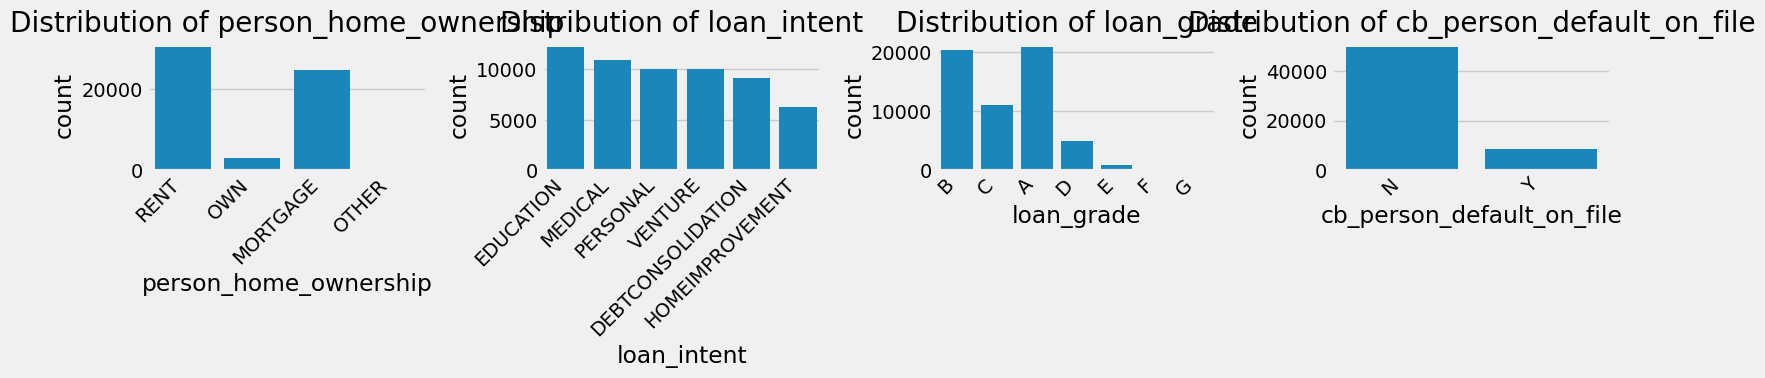

In [38]:
import matplotlib.pyplot as plt
categorical_cols = train.select_dtypes(include='object').columns

num_plots = len(categorical_cols)
rows = (num_plots + 3) // 4
cols = min(num_plots, 4)


plt.figure(figsize=(16, rows * 4))

for i, col in enumerate(categorical_cols):
  plt.subplot(rows, cols, i + 1)
  sns.countplot(x=train[col])
  plt.title(f'Distribution of {col}')
  plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [39]:
test_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39098 entries, 0 to 39097
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      39098 non-null  int64  
 1   person_income                   39098 non-null  int64  
 2   person_emp_length               39098 non-null  float64
 3   loan_amnt                       39098 non-null  int64  
 4   loan_int_rate                   39098 non-null  float64
 5   loan_percent_income             39098 non-null  float64
 6   cb_person_cred_hist_length      39098 non-null  int64  
 7   person_home_ownership_MORTGAGE  39098 non-null  bool   
 8   person_home_ownership_OTHER     39098 non-null  bool   
 9   person_home_ownership_OWN       39098 non-null  bool   
 10  person_home_ownership_RENT      39098 non-null  bool   
 11  loan_intent_DEBTCONSOLIDATION   39098 non-null  bool   
 12  loan_intent_EDUCATION           

In [40]:
test_encoded=test_encoded.reindex(columns=X_encoded.columns,fill_value=0)

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_encoded,y,test_size=0.2,stratify=y)

In [42]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

c:\Users\umert\anaconda3\envs\bigdata_env\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\umert\anaconda3\envs\bigdata_env\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


In [43]:
#from sklearn.linear_model import LogisticRegression
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.svm import SVC
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.ensemble import GradientBoostingClassifier
#from xgboost import XGBClassifier
#from sklearn.metrics import accuracy_score
#from sklearn.preprocessing import StandardScaler
#from joblib import Parallel, delayed
#from sklearn.metrics import roc_curve, auc, roc_auc_score
#
## 데이터 스케일링
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train_smote)
#X_test_scaled = scaler.transform(X_test)
#
## 모델 정의 수정
#models = {
#    'Logistic Regression': LogisticRegression(max_iter=5000, solver='liblinear'),
#    'Decision Tree': DecisionTreeClassifier(),
#    'Random Forest': RandomForestClassifier(n_jobs=-1,max_depth=10,n_estimators=100),
#    'Support Vector Classifier': SVC(probability=True),
#    'K-Nearest Neighbors': KNeighborsClassifier(n_jobs=-1),
#    'Gradient Boosting': GradientBoostingClassifier(),
#    'Xgboost Classifier': XGBClassifier(n_jobs=-1, eval_metric='auc',max_depth=10,n_estimators=100)
#}
#
#def train_and_evaluate(name, model, X_train, y_train, X_test, y_test):
#    model.fit(X_train, y_train)
#    
#    y_train_pred = model.predict(X_train)
#    y_test_pred = model.predict(X_test)
#    y_test_pred_proba = model.predict_proba(X_test)[:, 1]
#    
#    train_score = model.score(X_train, y_train)
#    test_score = model.score(X_test, y_test)
#    accuracy = accuracy_score(y_test, y_test_pred)
#    auc_score = roc_auc_score(y_test, y_test_pred_proba)
#    
#    return {
#        'Model': name,
#        'Train Score': train_score,
#        'Test Score': test_score,
#        'Accuracy Score': accuracy,
#        'AUC Score': auc_score
#    }
#
## 병렬 처리로 모델 학습 및 평가
#results = Parallel(n_jobs=-1)(
#    delayed(train_and_evaluate)(
#        name, model, X_train_scaled, y_train_smote, X_test_scaled, y_test
#    ) for name, model in models.items()
#)
#
#results_df = pd.DataFrame(results)
#print(results_df)

In [44]:
#plt.figure(figsize=(10, 8))
#for name, model in models.items():
#    model.fit(X_train_scaled, y_train_smote)
#    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
#    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
#    auc_score = roc_auc_score(y_test, y_pred_proba)
#    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.3f})')
#
#plt.plot([0, 1], [0, 1], 'k--')
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
#plt.xlabel('False Positive Rate')
#plt.ylabel('True Positive Rate')
#plt.title('ROC Curves for Different Models')
#plt.legend(loc="lower right")
#plt.show()

In [ ]:
# def train_and_evaluate_xgb(model, X_train, y_train, X_test, y_test):
#     model.fit(X_train, y_train)
#     y_pred_proba = model.predict_proba(X_test)[:, 1]
#     auc_score = roc_auc_score(y_test, y_pred_proba)
#     return model, auc_score
# 
# xgb = XGBClassifier(n_jobs=-1, eval_metric='auc', max_depth=10, n_estimators=100)
# results = Parallel(n_jobs=-1)(
#     delayed(train_and_evaluate_xgb)(
#         xgb, X_train_smote, y_train_smote, X_test_scaled, y_test
#     ) for _ in range(1)
# )
# 
# best_model, auc_score = results[0]
# print(f"XGBoost 모델의 AUC-ROC 점수: {auc_score:.4f}")
# 
# # 제출 데이터 예측
# submission_pred = best_model.predict(test_encoded)
# submission_df = pd.DataFrame({'id': test['id'], 'loan_status': submission_pred})
# submission_df.to_csv('submission.csv', index=False)
# sub = pd.read_csv('submission.csv')
# sub.head()

NameError: name 'XGBClassifier' is not defined

C:\Users\umert\AppData\Local\Temp\ipykernel_19940\1299004469.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=ax, data=df, x="loan_grade", y="loan_percent_income", palette=custom_palette)


<Axes: xlabel='loan_grade', ylabel='loan_percent_income'>

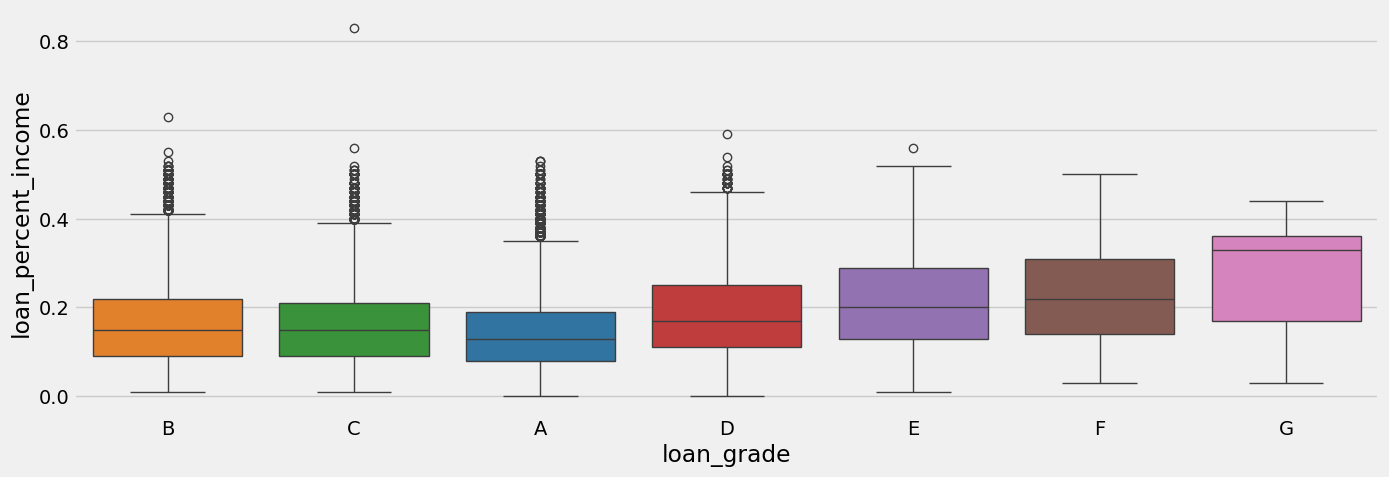

In [48]:
custom_palette = {
    "A": "#1f77b4",  # Blue
    "B": "#ff7f0e",  # Orange
    "C": "#2ca02c",  # Green
    "D": "#d62728",  # Red
    "E": "#9467bd",  # Purple
    "F": "#8c564b",  # Brown
    "G": "#e377c2"   # Pink
}
fix, ax = plt.subplots(figsize=(15, 5))
sns.boxplot(ax=ax, data=df, x="loan_grade", y="loan_percent_income", palette=custom_palette)

C:\Users\umert\AppData\Local\Temp\ipykernel_19940\763847464.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, data=df, x="person_home_ownership", palette=custom_colors)


<Axes: xlabel='person_home_ownership', ylabel='count'>

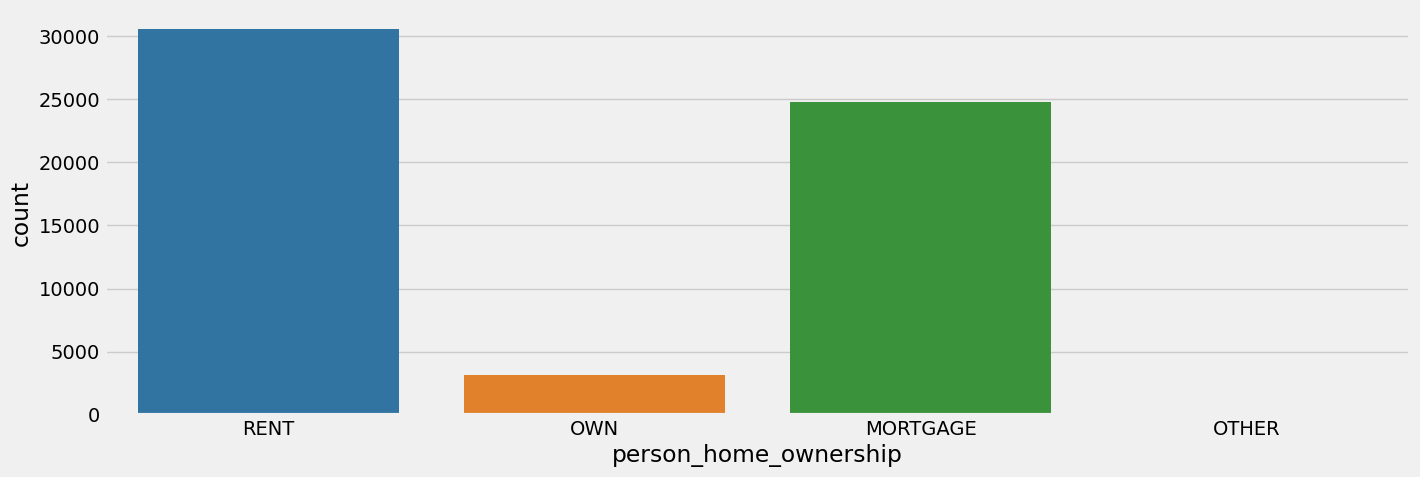

In [49]:
fig, ax = plt.subplots(figsize=(15, 5))

# Define a list of colors for each category
custom_colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]  # Blue, Orange, Green, Red

sns.countplot(ax=ax, data=df, x="person_home_ownership", palette=custom_colors)

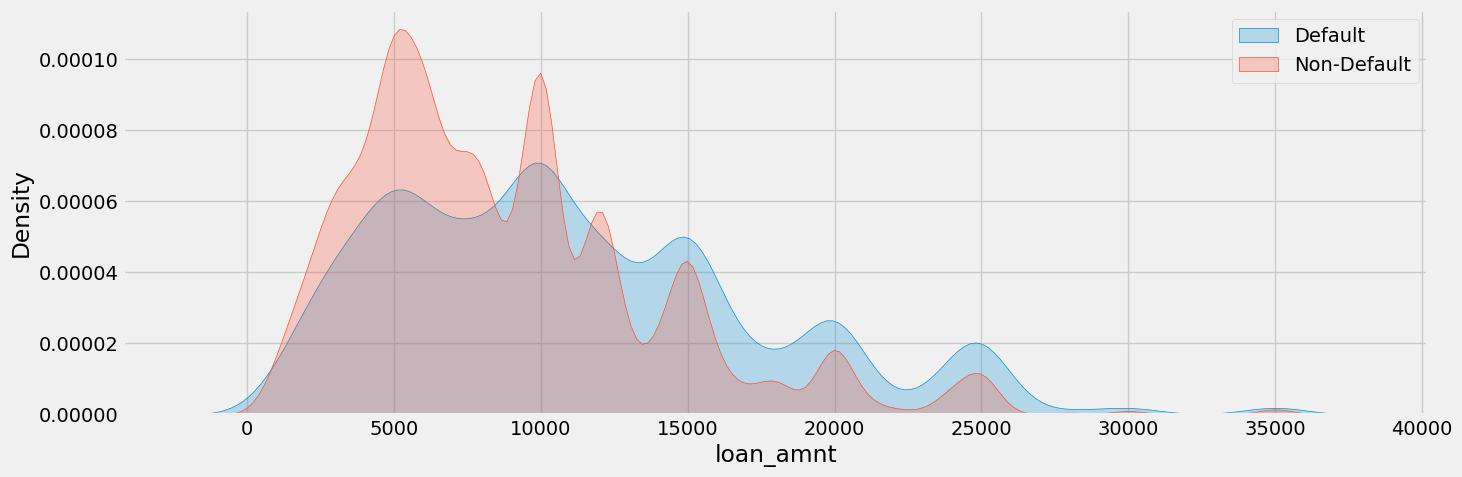

In [50]:
fig, ax = plt.subplots(figsize=(15, 5))

sns.kdeplot(data=df, x=df[df["loan_status"] == 1]["loan_amnt"], fill=True, label="Default")
sns.kdeplot(data=df, x=df[df["loan_status"] == 0]["loan_amnt"], fill=True, label="Non-Default")
plt.legend()

In [51]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle=True)
cv_scores = []
for train_idx, val_idx in skf.split(X_train, y_train):
    X_tr, X_val = X_train.iloc[train_idx, :], X_train.iloc[val_idx, :]
    y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]
    
    model = xgb.XGBClassifier(
        n_estimators=10000,
        objective="binary:logistic",
        learning_rate=0.01,
        early_stopping_rounds=50,
        enable_categorical=True,
        eval_metric="logloss"
    )
    
    model.fit(
        X_tr, y_tr,
        eval_set=[(X_tr, y_tr), (X_val, y_val)],
        verbose=False  # Set verbose to True to see training output
    )
    
    score = model.score(X_val, y_val)  # Evaluate on validation set
    cv_scores.append(score)
    print(score)

print(f"Cross-validation scores: {cv_scores}")
print(f"Mean accuracy: {np.mean(cv_scores):.2f} ± {np.std(cv_scores):.2f}")

0.9514066496163683
0.9510817435788127
0.9550250452946819
0.9533198337418736
0.9534264094639241
Cross-validation scores: [0.9514066496163683, 0.9510817435788127, 0.9550250452946819, 0.9533198337418736, 0.9534264094639241]
Mean accuracy: 0.95 ± 0.00


<Axes: title={'center': 'Feature importance'}>

<Figure size 2500x1200 with 0 Axes>

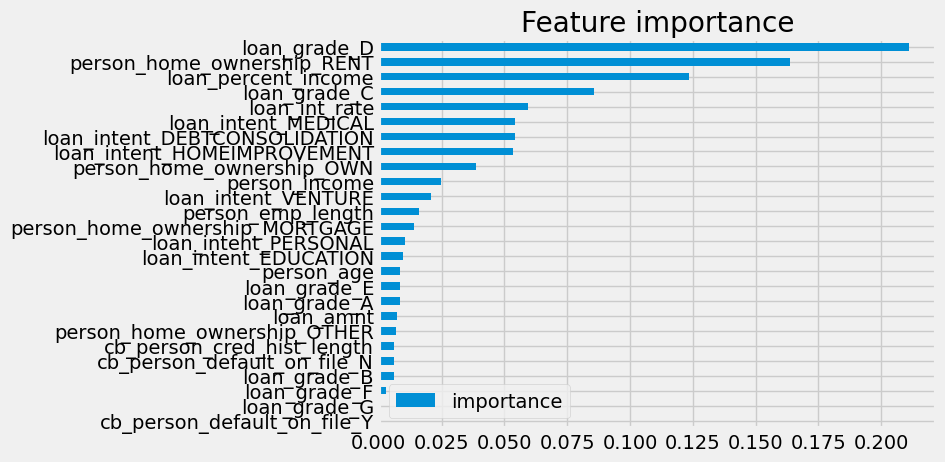

In [52]:
plt.figure(figsize=(25,12))

fi = pd.DataFrame(data=model.feature_importances_, index=model.feature_names_in_, columns=["importance"]).sort_values("importance")
fi.plot(kind="barh", title="Feature importance")

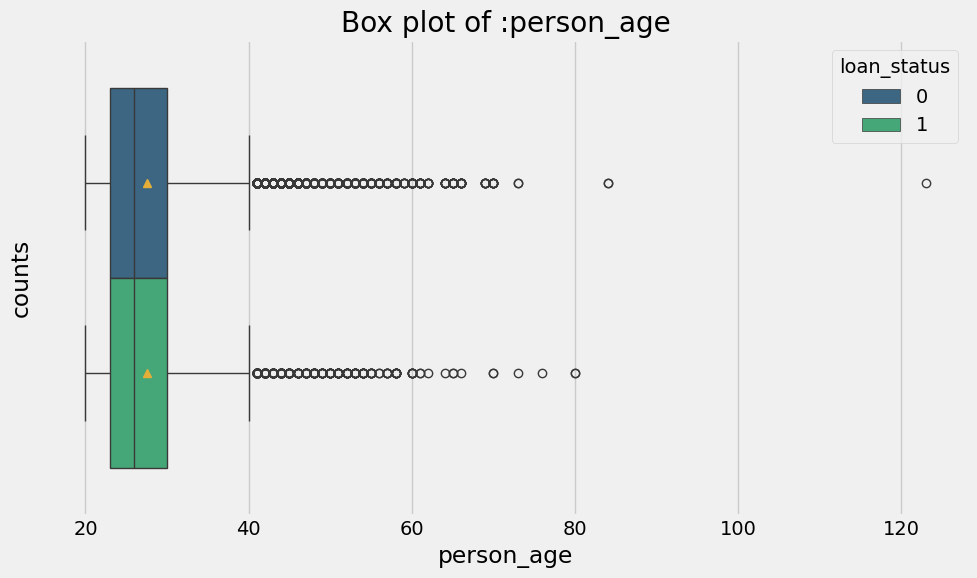

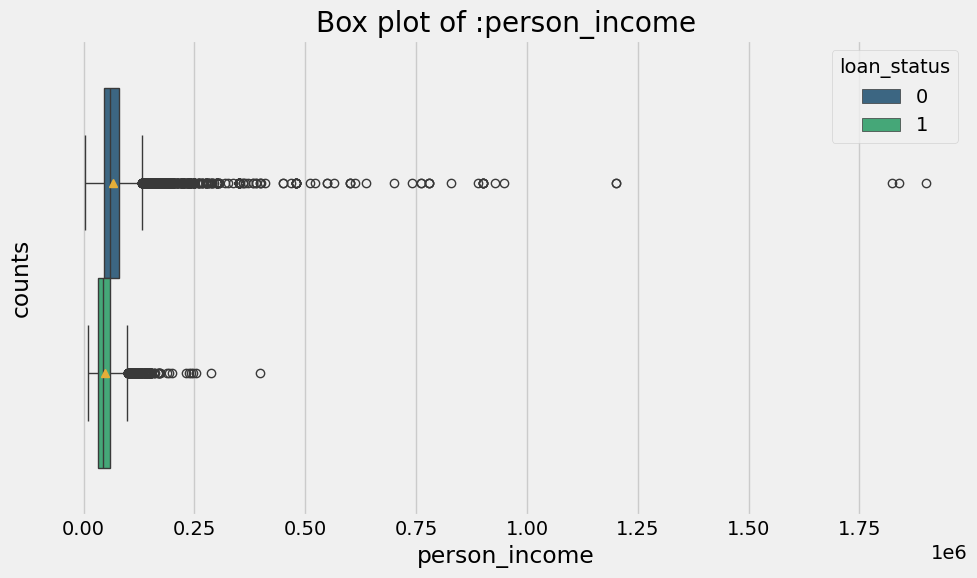

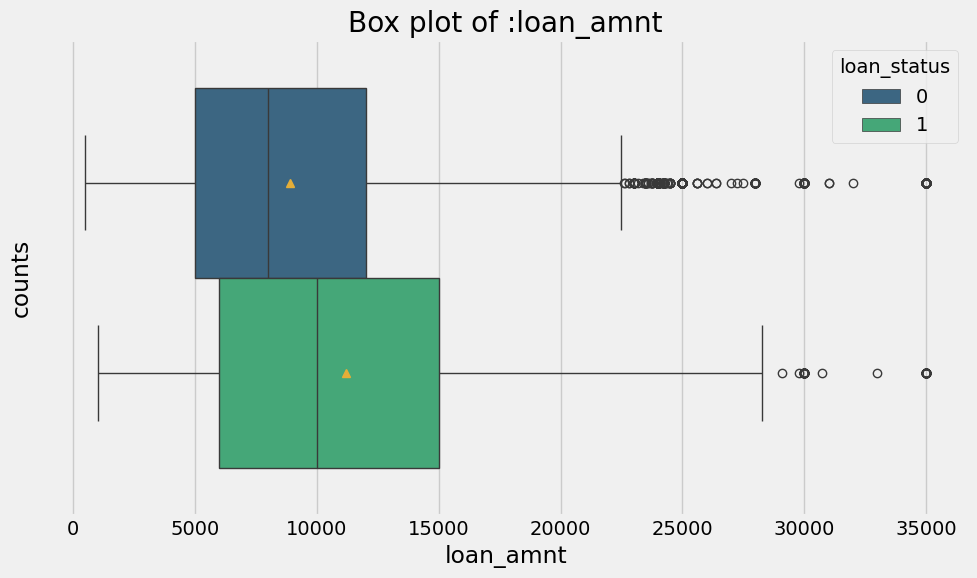

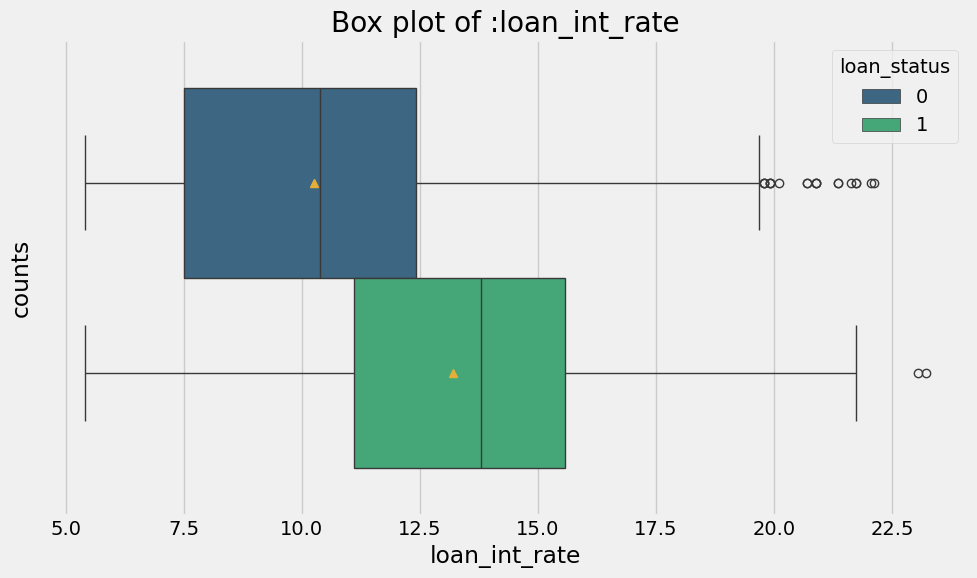

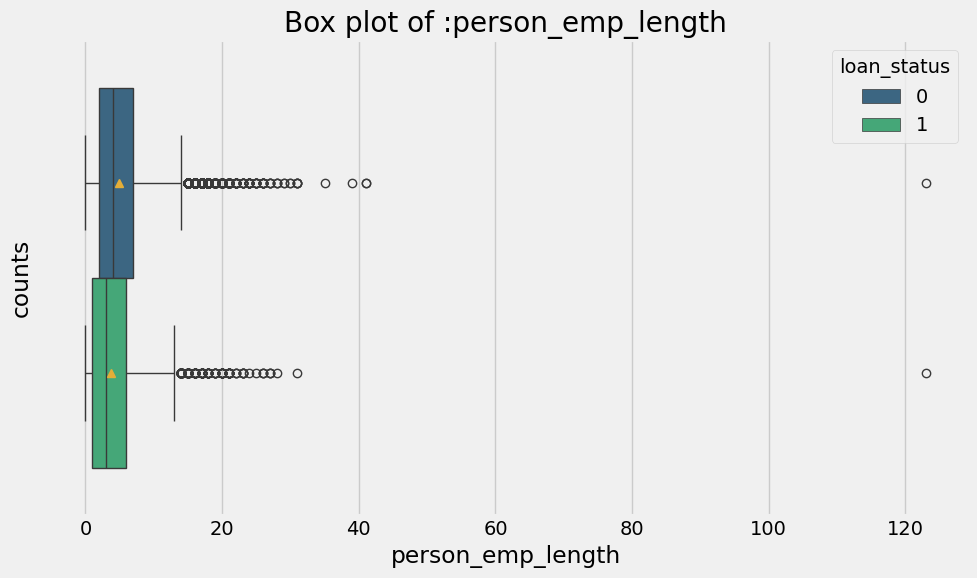

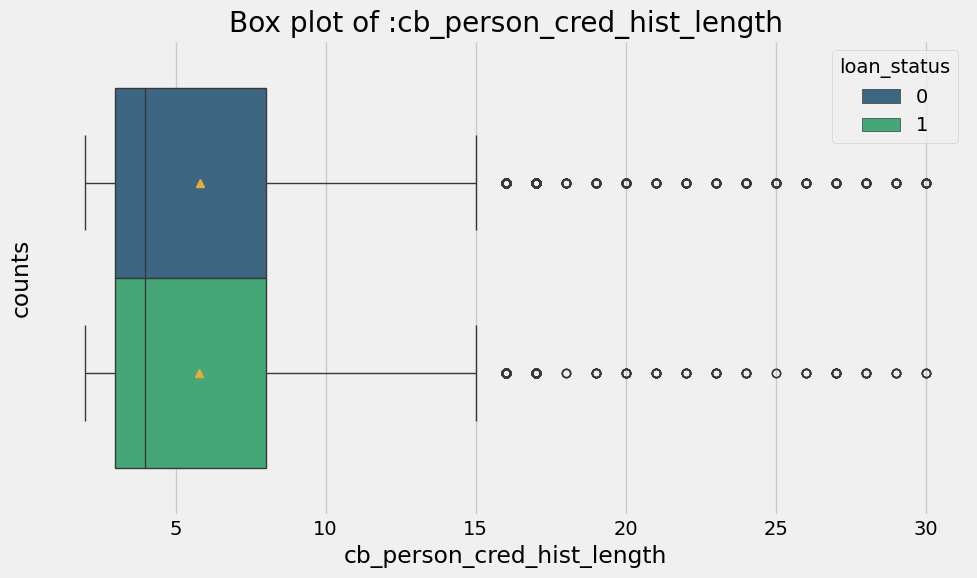

In [53]:
loan_box  = [
    'person_age', 'person_income', 'loan_amnt', 'loan_int_rate', 'person_emp_length','cb_person_cred_hist_length'
]
for boxcol in loan_box:
    plt.figure(figsize=(10,6))
    sns.boxplot(x= boxcol , data = df, hue = 'loan_status', palette='viridis', showmeans = True)
    plt.title(f'Box plot of :{boxcol}')
    plt.ylabel('counts')
    plt.tight_layout()
    plt.show()

c:\Users\umert\anaconda3\envs\bigdata_env\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 37.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\umert\anaconda3\envs\bigdata_env\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\umert\anaconda3\envs\bigdata_env\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 36.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\umert\anaconda3\envs\bigdata_env\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 37.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\umert\anaconda3\envs\bigdat

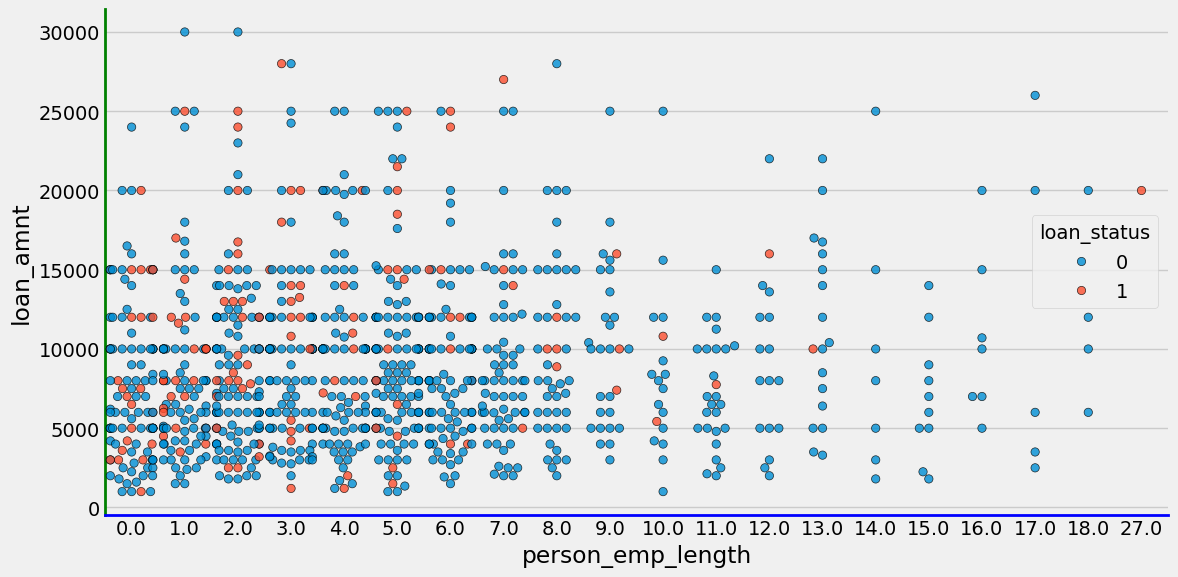

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(12, 6))

# Create the swarmplot with customizations
ax = sns.swarmplot(
    data=df.sample(1000),  # Sample 1000 data points
    y='loan_amnt', 
    x='person_emp_length', 
    hue='loan_status',
    size=6,               # Adjust the size of the points
    edgecolor='black',    # Add black borders
    linewidth=0.5,        # Set the border thickness
    alpha=0.8,            # Add transparency
    marker='o'            # Set the marker shape
)

# Customize axis lines
ax.spines['bottom'].set_color('blue')  # X-axis line color
ax.spines['left'].set_color('green')   # Y-axis line color
ax.spines['bottom'].set_linewidth(2)   # X-axis line thickness
ax.spines['left'].set_linewidth(2)     # Y-axis line thickness

# Hide the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Tighten the layout
plt.tight_layout()

# Display the plot
plt.show()



c:\Users\umert\anaconda3\envs\bigdata_env\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 36.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\umert\anaconda3\envs\bigdata_env\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 31.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\umert\anaconda3\envs\bigdata_env\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 12.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


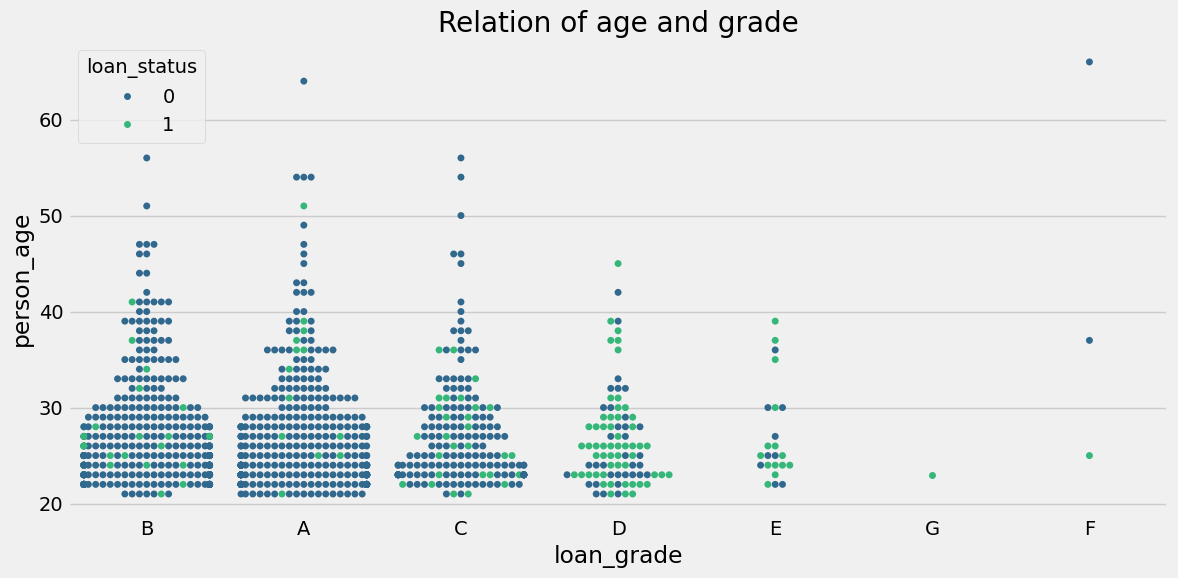

In [55]:
plt.figure(figsize=(12,6))
sns.swarmplot(data = df.sample(1000), x = 'loan_grade' ,y = 'person_age', hue = 'loan_status', palette='viridis')
plt.title('Relation of age and grade')
plt.tight_layout()
plt.show()

c:\Users\umert\anaconda3\envs\bigdata_env\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 10.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


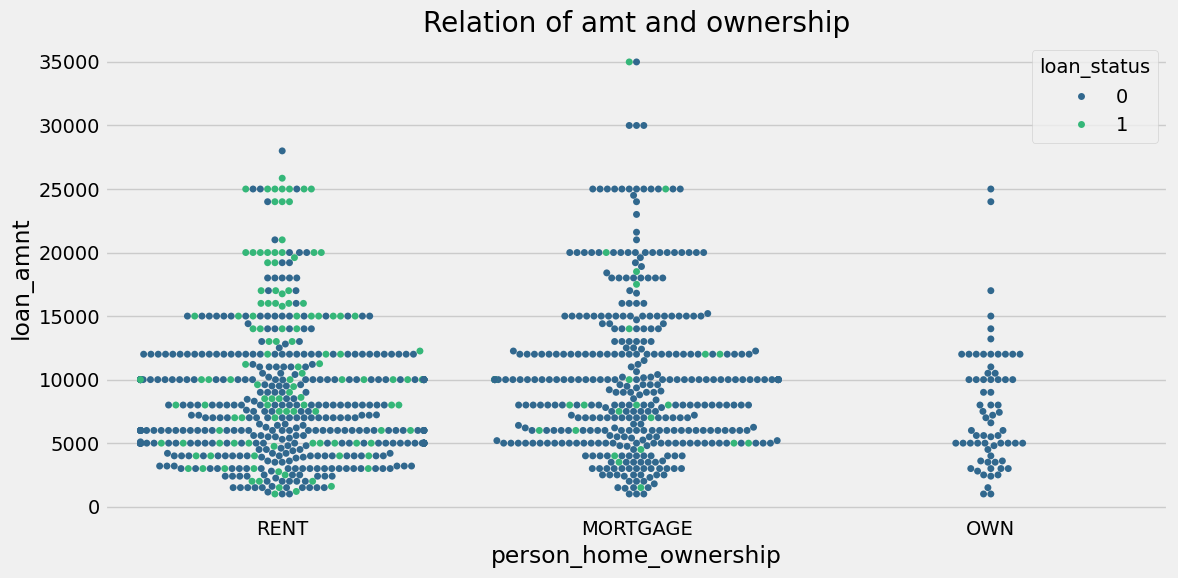

In [56]:
plt.figure(figsize=(12,6))
sns.swarmplot(data = df.sample(1000), x = 'person_home_ownership' ,y = 'loan_amnt', hue = 'loan_status', palette='viridis')
plt.title('Relation of amt and ownership')
plt.tight_layout()
plt.show()

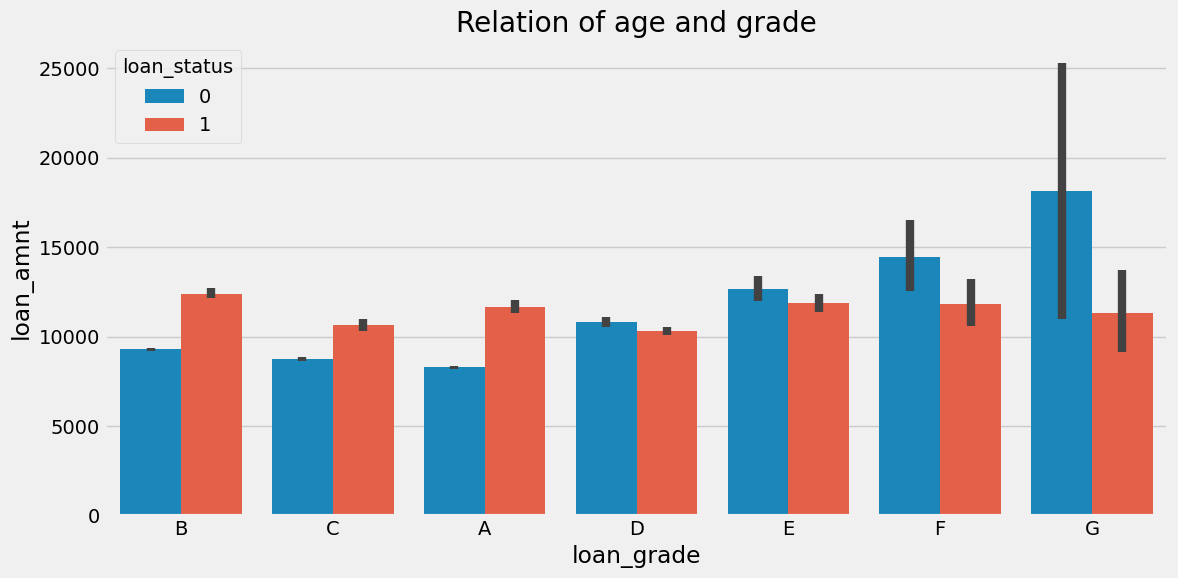

In [57]:
plt.figure(figsize=(12,6))
sns.barplot(data = df, y = 'loan_amnt' ,x = 'loan_grade',hue = 'loan_status' )
plt.title('Relation of age and grade')
plt.tight_layout()
plt.show()

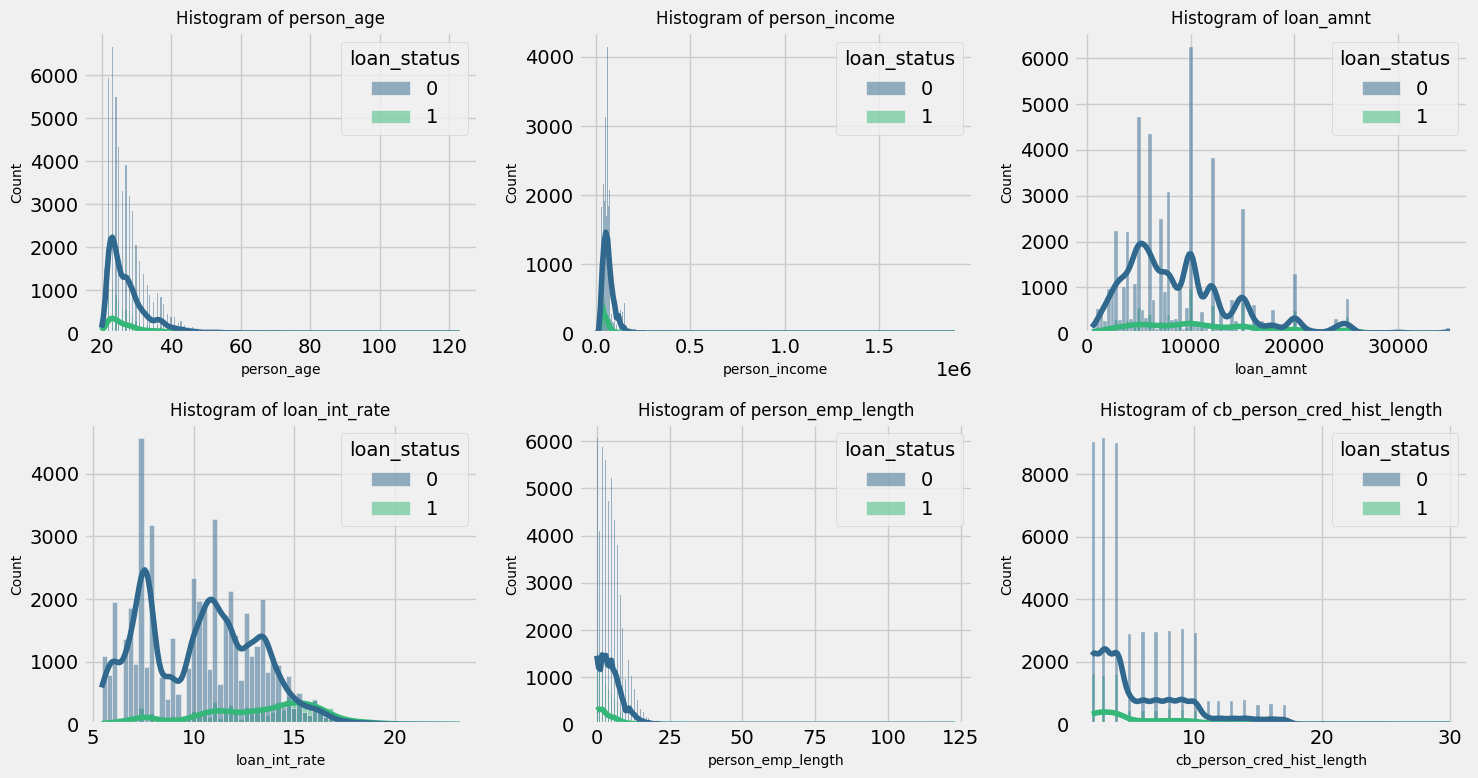

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define columns for histogram plotting
hist_plot = [
    'person_age', 'person_income', 'loan_amnt', 'loan_int_rate',
    'person_emp_length', 'cb_person_cred_hist_length'
]

# Set up the grid layout
num_plots = len(hist_plot)
rows = (num_plots + 2) // 3  # Arrange in 3 columns
cols = 3

fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten()  # Flatten to iterate over all axes

# Loop through the columns and create histograms
for i, col in enumerate(hist_plot):
    sns.histplot(
        data=df,
        x=col,
        hue='loan_status',
        palette='viridis',
        kde=True,
        ax=axes[i]  # Specify the subplot axis
    )
    axes[i].set_title(f'Histogram of {col}', fontsize=12)
    axes[i].set_xlabel(col, fontsize=10)
    axes[i].set_ylabel('Count', fontsize=10)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


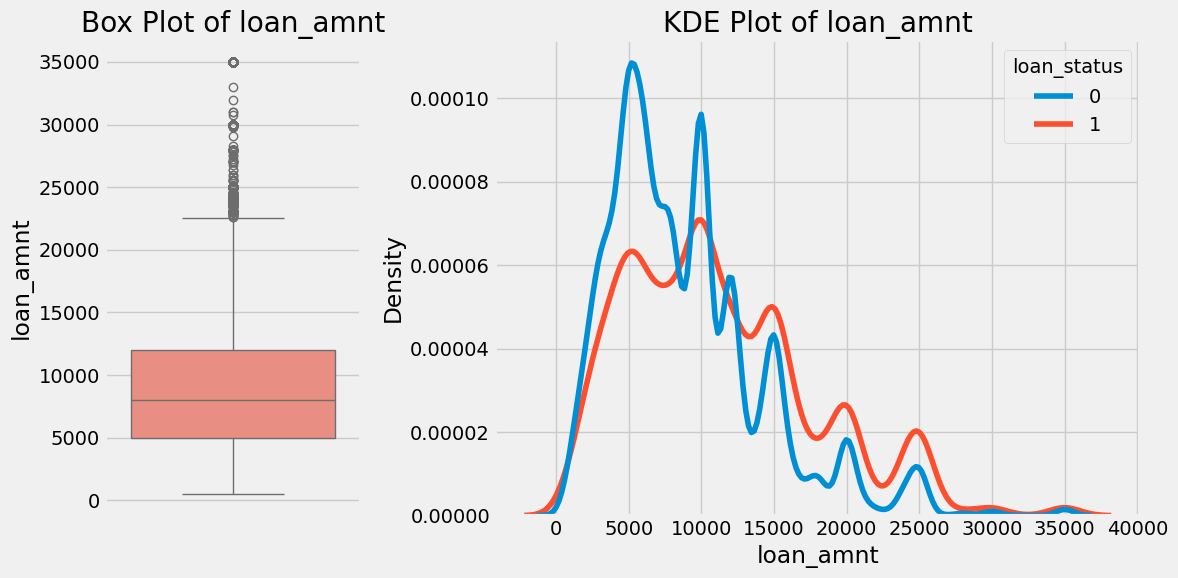

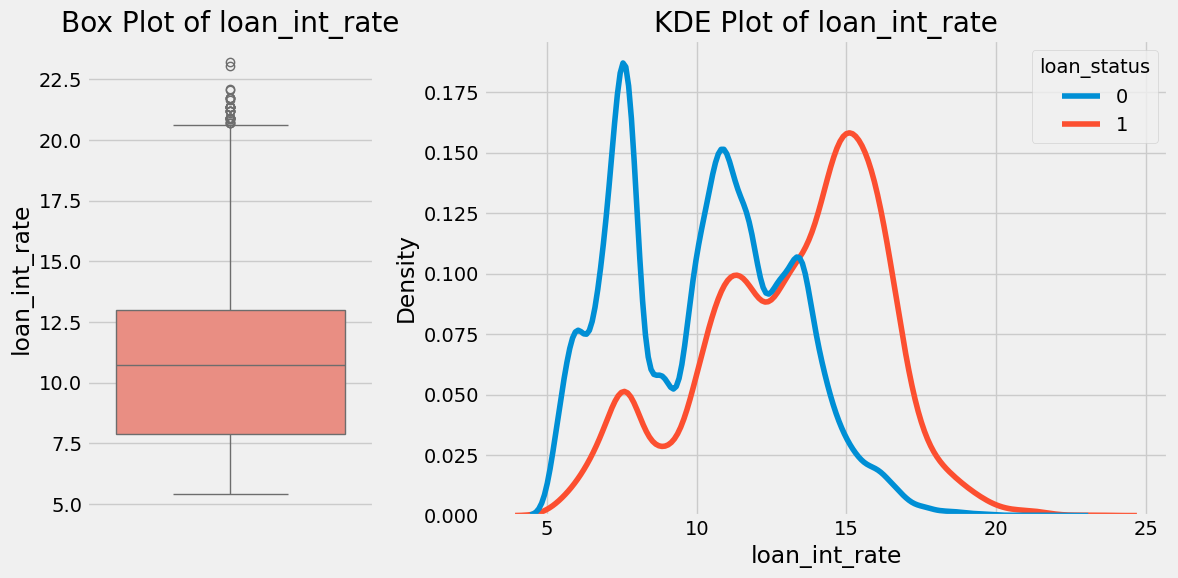

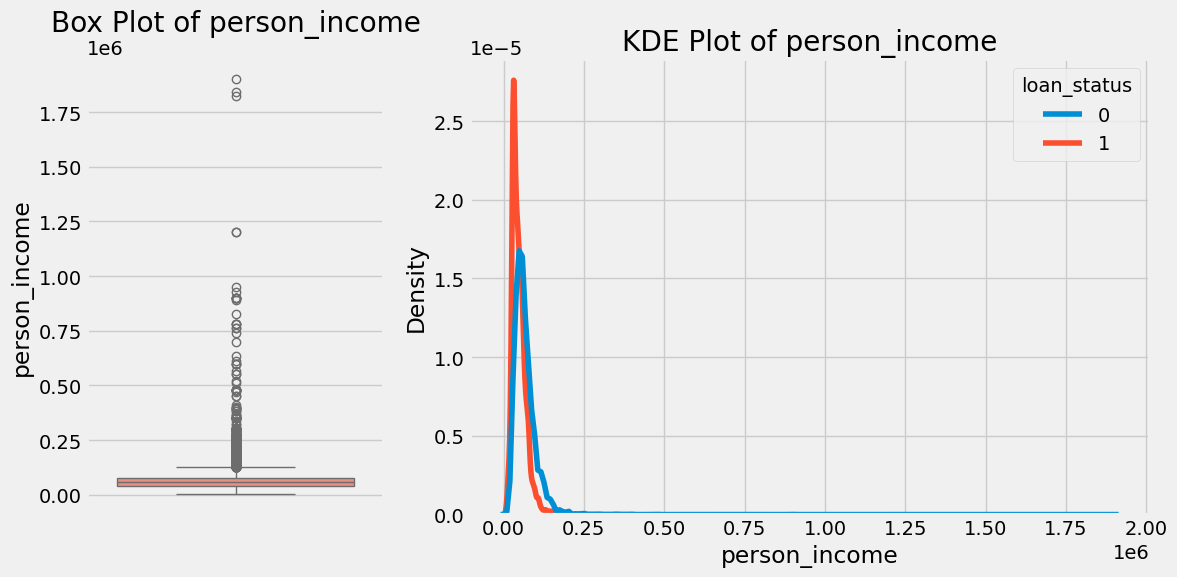

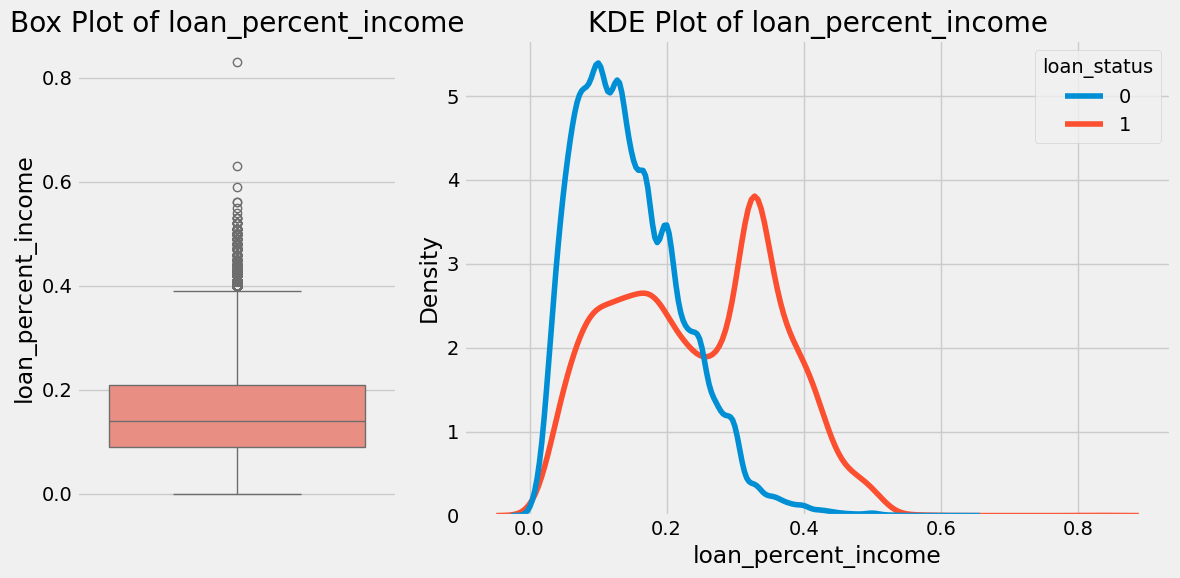

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

def plot_box_and_kde(df, column):
    # 创建一个图形对象，并使用 GridSpec 定义网格布局
    fig = plt.figure(figsize=(12, 6))
    gs = GridSpec(1, 3, figure=fig)  # 创建1行3列的网格，宽度比为1:2
    
    # 绘制箱型图，占据网格1/3的宽度
    ax1 = plt.subplot(gs[0, 0])
    sns.boxplot(y=df[column], color='salmon', ax=ax1)
    ax1.set_title(f'Box Plot of {column}')
    
    # 绘制核密度图，占据网格2/3的宽度
    ax2 = plt.subplot(gs[0, 1:])
    sns.kdeplot(data=df, x=column, hue="loan_status", common_norm=False, ax=ax2)  # 每个分组分别独立标准化
    ax2.set_title(f'KDE Plot of {column}')
    plt.tight_layout()
    plt.show()

# 以贷款是否被批准分组，不同组分布差别较大的变量有贷款金额、贷款年利率、年收入、贷款收入比。
# plot_box_and_kde(df_train_cleaned, 'person_age')
# plot_box_and_kde(df_train_cleaned, 'person_emp_length')
plot_box_and_kde(df, 'loan_amnt')
plot_box_and_kde(df, 'loan_int_rate')
plot_box_and_kde(df, 'person_income')
plot_box_and_kde(df, 'loan_percent_income')
# plot_box_and_kde(df_train_cleaned, 'cb_person_cred_hist_length')

**Feature Engineering**

In [60]:
df_train=pd.read_csv("train.csv")
df_test= pd.read_csv('test.csv')
df_train= df_train.drop(['id'], axis=1)

In [61]:
df_train.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [62]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  58645 non-null  int64  
 1   person_income               58645 non-null  int64  
 2   person_home_ownership       58645 non-null  object 
 3   person_emp_length           58645 non-null  float64
 4   loan_intent                 58645 non-null  object 
 5   loan_grade                  58645 non-null  object 
 6   loan_amnt                   58645 non-null  int64  
 7   loan_int_rate               58645 non-null  float64
 8   loan_percent_income         58645 non-null  float64
 9   cb_person_default_on_file   58645 non-null  object 
 10  cb_person_cred_hist_length  58645 non-null  int64  
 11  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 5.4+ MB


In [63]:
df_train.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


In [64]:
null_values = df_train.isnull()

# Count null values per column
null_counts = df_train.isnull().sum()

print("Null Values in DataFrame:")
print(len(null_values))

print("\nCount of Null Values in Each Column:")
print(null_counts)

Null Values in DataFrame:
58645

Count of Null Values in Each Column:
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64


In [65]:
for item in df_train.columns[1:]:
    print(f'{item} : {df_train[item].unique()}')
    print('-'* 50)

person_income : [ 35000  56000  28800 ...  44955  90730 124600]
--------------------------------------------------
person_home_ownership : ['RENT' 'OWN' 'MORTGAGE' 'OTHER']
--------------------------------------------------
person_emp_length : [  0.   6.   8.  14.   2.   9.  11.   5.   1.  13.   3.  10.  12.   4.
   7.  21.  17.  16.  18.  19.  15.  20.  23.  24.  26.  22.  25.  41.
  27.  28.  35.  29.  30.  31. 123.  39.]
--------------------------------------------------
loan_intent : ['EDUCATION' 'MEDICAL' 'PERSONAL' 'VENTURE' 'DEBTCONSOLIDATION'
 'HOMEIMPROVEMENT']
--------------------------------------------------
loan_grade : ['B' 'C' 'A' 'D' 'E' 'F' 'G']
--------------------------------------------------
loan_amnt : [ 6000  4000 12000  9000  2500  5000 15000 12800 10000 16000  7300 17000
  5950  4800  3200  7000  3000  3500 14000  2800  2000  5500 14400 15900
 12500  8000  2400 20000 14125  9600 17200  4200  7200 18000 23500  3550
  9800 24000 19500  6500 17500  4500 19750 2800

In [66]:
cat_col = df_train.select_dtypes(include=['object']).columns
for items in cat_col:
    print(f'{df_train[items].value_counts()}')
    print('-'* 50)

person_home_ownership
RENT        30594
MORTGAGE    24824
OWN          3138
OTHER          89
Name: count, dtype: int64
--------------------------------------------------
loan_intent
EDUCATION            12271
MEDICAL              10934
PERSONAL             10016
VENTURE              10011
DEBTCONSOLIDATION     9133
HOMEIMPROVEMENT       6280
Name: count, dtype: int64
--------------------------------------------------
loan_grade
A    20984
B    20400
C    11036
D     5034
E     1009
F      149
G       33
Name: count, dtype: int64
--------------------------------------------------
cb_person_default_on_file
N    49943
Y     8702
Name: count, dtype: int64
--------------------------------------------------


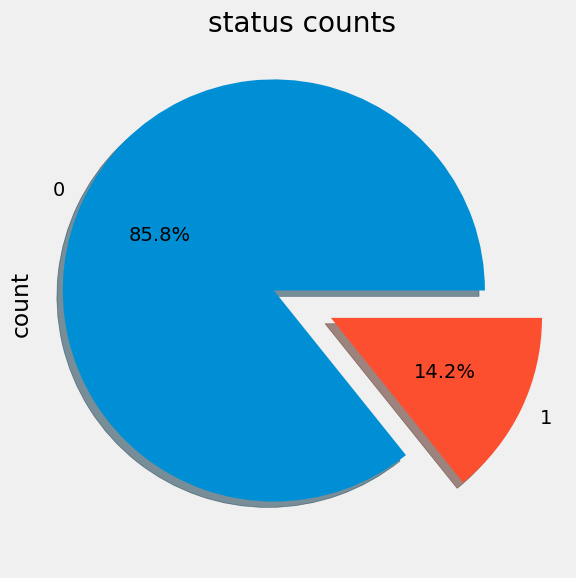

In [67]:
plt.figure(figsize=(8,6))
df_train['loan_status'].value_counts().plot.pie(autopct = '%1.1f%%', explode = [0.15, 0.15], shadow = True).set_title('status counts')
plt.tight_layout()
plt.show()

In [68]:
train_df = df_train[df_train['person_age']<90].reset_index(drop=True)
train_df1 = train_df[train_df['person_income']<1e6].reset_index(drop=True)
df2 = train_df1[train_df1['person_emp_length']<60].reset_index(drop=True)

In [69]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,58637.0,27.549295,6.020565,20.00,23.00,26.00,30.00,84.00
person_income,58637.0,63914.178317,35079.256206,4200.00,42000.00,58000.00,75600.00,948000.00
person_emp_length,58637.0,4.696796,3.898935,0.00,2.00,4.00,7.00,41.00
loan_amnt,58637.0,9217.224653,5563.436397,500.00,5000.00,8000.00,12000.00,35000.00
loan_int_rate,58637.0,10.677793,3.034637,5.42,7.88,10.75,12.99,23.22
loan_percent_income,58637.0,0.159245,0.091687,0.00,0.09,0.14,0.21,0.83
cb_person_cred_hist_length,58637.0,5.813701,4.029377,2.00,3.00,4.00,8.00,30.00
loan_status,58637.0,0.142385,0.349447,0.00,0.00,0.00,0.00,1.00


In [70]:
on_file ={
    'N' : 0,
    'Y' : 1
    }

df2['cb_person_default_on_file'] = df2['cb_person_default_on_file'].map(on_file)
df_test['cb_person_default_on_file'] = df_test['cb_person_default_on_file'].map(on_file)

In [76]:
cat_cols = df2.select_dtypes(['object']).columns
stand_col = ['person_age', 'person_income','person_emp_length', 'loan_amnt','loan_int_rate', 'loan_percent_income','cb_person_cred_hist_length']

In [77]:
cat_cols

Index(['person_home_ownership', 'loan_intent', 'loan_grade'], dtype='object')

In [72]:
x_train = df2.drop(columns='loan_status', axis =1)
y_train = df2['loan_status']
x_test = df_test

In [73]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [75]:
def one_hot_encode_concatenate(X_train: pd.DataFrame, X_test: pd.DataFrame):
    """
    Concatenates training and test datasets, applies one-hot encoding, 
    and splits the datasets back into training and test sets.

    Args:
        X_train (pd.DataFrame): Training feature matrix.
        X_test (pd.DataFrame): Testing feature matrix.
        cat_cols (list): List of categorical columns to be one-hot encoded.

    Returns:
        tuple: One-hot encoded X_train and X_test datasets.
    """
    # Concatenate X_train and X_test
    combined_data = pd.concat([X_train, X_test], axis=0, ignore_index=True)
    cat_cols= combined_data.select_dtypes(['object']).columns
    # One-hot encode the categorical columns
    onehot_encoder = OneHotEncoder(handle_unknown="ignore", sparse=False)
    encoded_data = onehot_encoder.fit_transform(combined_data[cat_cols])
    
    # Convert encoded data to DataFrame
    encoded_columns = onehot_encoder.get_feature_names_out(cat_cols)
    encoded_df = pd.DataFrame(encoded_data, columns=encoded_columns)

    # Drop the original categorical columns and add the encoded ones
    combined_data_encoded = combined_data.drop(columns=cat_cols).join(encoded_df)
    
    # Split the data back into X_train and X_test
    X_train_encoded = combined_data_encoded.iloc[:len(X_train), :]
    X_test_encoded = combined_data_encoded.iloc[len(X_train):, :]

    return X_train_encoded, X_test_encoded

In [74]:
def testing_diff_model(x_train, y_train, x_test, model):
    combine = pd.concat([x_train, x_test])
    coltrans = make_column_transformer(
        (OneHotEncoder(handle_unknown='ignore'), cat_cols),
        (StandardScaler(), stand_col),
        remainder='passthrough'
    )

    pipe = make_pipeline(coltrans, model)
    cv_scor = cross_val_score(pipe, x_train, y_train, cv =10  )

    print(f'For the model {model.__class__.__name__}')
    print(f'The Cv score is : {cv_scor}')
    print(f'Mean of the CV is : {cv_scor.mean():.4f}')
    print(f'SD of the CV is : {cv_scor.std():.4f}')

    pipe.fit(x_train, y_train)
    ypred = pipe.predict(x_test)

    return ypred


models = [
    LogisticRegression(max_iter=1000),
    LinearSVC(),
    XGBClassifier(n_estimators = 350),
    RandomForestClassifier(n_estimators=150),
    AdaBoostClassifier(learning_rate=.15,n_estimators=100),
    KNeighborsClassifier(n_neighbors=5),
    GradientBoostingClassifier(n_estimators=200, learning_rate=0.15)
]
predictions = []
for model in models :
    predic = testing_diff_model(x_train, y_train, x_test, model)
    predictions.append(predic)
    testing_diff_model(x_train, y_train, x_test, model)
    print('-'* 50)

For the model LogisticRegression
The Cv score is : [0.91319918 0.90808322 0.9106412  0.90978854 0.91388131 0.91183492
 0.91302865 0.91454887 0.91028484 0.91335494]
Mean of the CV is : 0.9119
SD of the CV is : 0.0020
For the model LogisticRegression
The Cv score is : [0.91319918 0.90808322 0.9106412  0.90978854 0.91388131 0.91183492
 0.91302865 0.91454887 0.91028484 0.91335494]
Mean of the CV is : 0.9119
SD of the CV is : 0.0020
--------------------------------------------------
For the model LinearSVC
The Cv score is : [0.90995907 0.90330832 0.90978854 0.90654843 0.91132333 0.90995907
 0.90944748 0.91506055 0.90909091 0.9104554 ]
Mean of the CV is : 0.9095
SD of the CV is : 0.0029
For the model LinearSVC
The Cv score is : [0.90995907 0.90330832 0.90978854 0.90654843 0.91132333 0.90995907
 0.90944748 0.91506055 0.90909091 0.9104554 ]
Mean of the CV is : 0.9095
SD of the CV is : 0.0029
--------------------------------------------------
For the model XGBClassifier
The Cv score is : [0.944

KeyboardInterrupt: 

In [83]:
test_id = df_test['id']
output = pd.DataFrame({
    'id' : test_id,
    'loan_status' : predic
})
output.to_csv('To_submmit.csv', index=False)
output.head()

,id,loan_status
0,58645,1
1,58646,0
2,58647,1
3,58648,0
4,58649,0
